In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, r_regression,  mutual_info_regression, SelectFromModel

import tqdm

## Dataset Reading

In [2]:
# Path of file
training_data = 'train.csv'
validation_data = 'validation.csv'

### Training samples

In [3]:
# Reading Training Set
df_train = pd.read_csv(training_data, header = None)

print("Size = {}\nShape = {}\n".format(df_train.size, df_train.shape))

df_train.head()

Size = 295200
Shape = (144, 2050)



0     1         2         3         4         5         6     \
0  Sample_0002     9  0.001818  0.058018  0.079352  0.017937  0.138092   
1  Sample_0132     6  0.130129  0.223518  0.022346  0.007356  0.883341   
2  Sample_0176     6  0.272370  0.041683  0.261952  0.337672  0.904324   
3  Sample_0046     1  0.561121  1.004120  0.113220  0.017158  0.034897   
4  Sample_0160     6  0.307962  0.060208  0.000000  0.004815  0.000000   

       7         8         9     ...      2040      2041      2042      2043  \
0  0.781016  0.809967  0.040714  ...  0.000000  0.000000  0.011508  0.068883   
1  0.961499  0.819911  0.301842  ...  0.013055  0.024077  0.392501  0.330532   
2  1.291325  0.854422  0.198708  ...  0.058794  0.200053  0.010550  0.019223   
3  0.083389  0.812934  1.371410  ...  1.233769  0.591835  0.257092  0.003301   
4  0.110576  0.932561  0.736380  ...  0.340173  0.245761  0.319120  0.084845   

       2044      2045      2046      2047      2048      2049  
0  0.080087  0.214424  0.041340  0.000000  0.000000  0.000656  
1  0.056257  0.053240  0.054429  0.061702  0.019216  0.018923  
2  0.000900  0.000000  0.000349  0.000000  0.004310  0.075912  
3  0.000181  0.000074  0.008841  0.082230  0.760075  0.242426  
4  0.227459  0.047097  0.008360  0.085537  0.737439  0.541516  

[5 rows x 2050 columns]

In [4]:
# Extracting data from dataframes to array
sample_name_train = df_train[0].to_numpy()
y_train = df_train[1].to_numpy()
y_train = np.reshape(y_train,(y_train.shape[0],1))
features_train = df_train.iloc[:,2:].to_numpy()

# df_train = None

print("Dimension of sample_name:",np.shape(sample_name_train))
print("Dimension of y:",np.shape(y_train))
print("Dimension of features:",np.shape(features_train))

X_train = np.hstack((np.ones((np.shape(features_train)[0],1)), features_train))
print("Dimension of X train:",X_train.shape)

Dimension of sample_name: (144,)
Dimension of y: (144, 1)
Dimension of features: (144, 2048)
Dimension of X train: (144, 2049)


### Validation Samples

In [5]:
df_validation = pd.read_csv(validation_data, header = None)
print("Size = {}\nShape = {}\n".format(df_validation.size, df_validation.shape))
df_validation.head()

Size = 43050
Shape = (21, 2050)



0     1         2         3         4         5         6     \
0  Sample_0044     2  0.861231  1.196187  0.891775  0.246000  0.304779   
1  Sample_0098     3  0.207111  0.079170  0.016595  0.010206  0.298020   
2  Sample_0127     6  0.635742  0.279725  0.033033  0.047822  0.736427   
3  Sample_0118     4  0.162205  0.000231  0.000000  0.000000  0.013716   
4  Sample_0053     4  0.388722  0.938067  0.762723  0.136639  0.229058   

       7         8         9     ...      2040      2041      2042      2043  \
0  0.327325  0.371403  0.922999  ...  0.526902  0.459115  0.457802  0.033232   
1  0.070030  0.089516  0.008703  ...  0.138625  0.446480  0.050020  0.085055   
2  0.839229  0.982129  0.856600  ...  0.000000  0.000000  0.037842  0.427024   
3  0.162195  0.383363  0.580414  ...  0.233874  0.253131  0.172464  0.120456   
4  0.164377  0.303112  0.627291  ...  0.413360  0.125176  0.668717  0.081628   

       2044      2045      2046      2047      2048      2049  
0  0.368890  0.269538  0.048582  0.074251  0.452948  0.350218  
1  0.299308  0.043929  0.051008  0.098806  1.076434  0.731704  
2  2.042293  1.470971  0.809386  0.103609  0.014270  0.014284  
3  0.254290  0.101869  0.005896  0.000000  0.544907  0.426949  
4  0.025815  0.001790  0.016391  0.349890  0.494582  0.149095  

[5 rows x 2050 columns]

In [6]:
sample_name_validation = df_validation[0].to_numpy()
y_validation = df_validation[1].to_numpy()
y_validation = np.reshape(y_validation,(y_validation.shape[0],1))
features_validation = df_validation.iloc[:,2:].to_numpy()

df_validation = None

print("Dimension of sample_name:",np.shape(sample_name_validation))
print("Dimension of y:",np.shape(y_validation))
print("Dimension of features:",np.shape(features_validation))

X_validation = np.hstack((np.ones((np.shape(features_validation)[0],1)), features_validation))
print("Dimesnion of X_validation:", X_validation.shape)

Dimension of sample_name: (21,)
Dimension of y: (21, 1)
Dimension of features: (21, 2048)
Dimesnion of X_validation: (21, 2049)


# Task 1

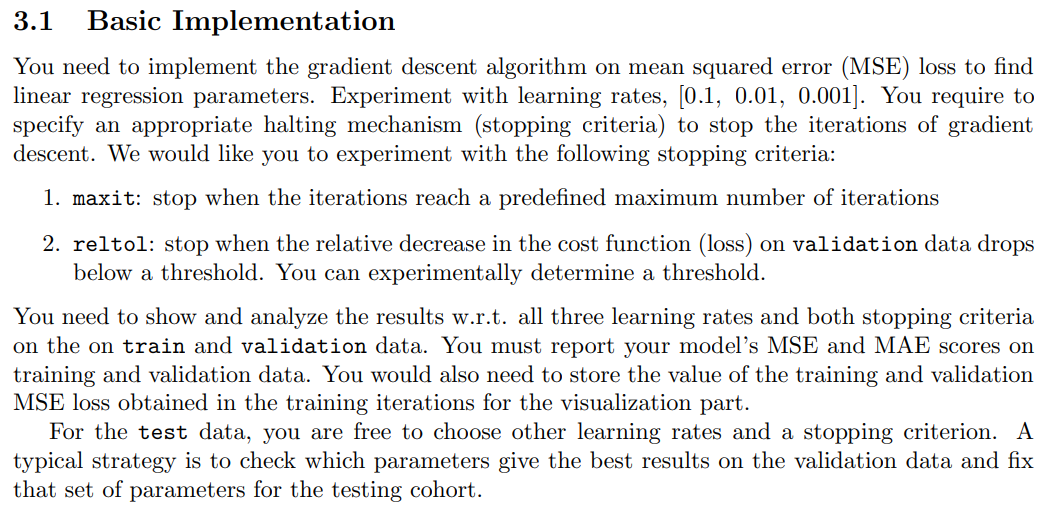

In [7]:
'''
    @input params
        Training Data
            X_t, y_t
        Validation Data
            X_v, y_v
        steps     : learning rates
        max_it    : max no. of iteration
        reltol    : threshold w.r.t relative change in cost function of validation data
        threshold : threshold w.r.t to square error in training data
        
    @output params
        w     : weights
        MSE_t : MSE of training data in each iteration
        MSE_v : MSE of validation data in each iteration
'''
def gradient_descent_withE(X_t, y_t, X_v, y_v, steps, max_it, reltol, threshold):
    
    #Initalising Parameters
    N_t = X_t.shape[0]
    N_v = X_v.shape[0]
    d1 = X_t.shape[1]
    
    w = np.zeros([d1,1])
#     w = np.random.random((d1,1))/10

    XT = np.transpose(X_t)
    XT_X = np.matmul(XT,X_t)
    
    MSE_t = []
    MSE_v = []
    MSE_relative = []
    
    # Iterative loop for minimizing cost function i.e. MSE     
    for i in tqdm.tqdm(range(0,max_it)):
        
        # calculating gradient
#         grad = 2/N_t*(np.matmul(XT_X, w) - np.matmul(XT, y_t))
#         norm_grad = grad/np.sqrt(np.sum(grad**2))

        grad = 2/N_t*(np.matmul(XT_X, w) - np.matmul(XT, y_t))
        norm_grad = grad
        
        # updating weights    
        w -= steps*norm_grad
        
        #estimating training error
        e_t = np.matmul(X_t,w) - y_t
        MSEin_t = 1/N_t*np.matmul(np.transpose(e_t),e_t)[0][0]
#         MSEin_t = np.sum(e_t**2)/N_t
        MSE_t.append(MSEin_t)
        
        # estimating validation error
        e_v = np.matmul(X_v,w) - y_v
        MSEin_v = 1/N_v*np.matmul(np.transpose(e_v),e_v)[0][0]
#         MSEin_v = np.sum(e_v**2)/N_v
        MSE_v.append(MSEin_v)
        
#         going out from loop if threshold has reached
        if(i > 2):
            MSE_relative.append(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v)
            if(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v<reltol):
                print(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v)                
                break
            
    
    return w, MSE_t, MSE_v, MSE_relative

In [8]:
w, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(X_train, y_train, X_validation, y_validation, 0.001, 5000, 1e-6, 0)

  2%|█▎                                                        | 116/5000 [00:00<00:07, 635.23it/s]

9.835491078054533e-07


In [9]:
mse_train = np.sum((X_train@w-y_train)**2)/X_train.shape[0]
mae_train = np.sum(np.abs(X_train@w-y_train))/X_train.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  0.3882155248869361
MAE for training set:  0.5009191290920317
MSE for validation set:  0.563460610934305
MAE for validation set:  0.5627266791099007


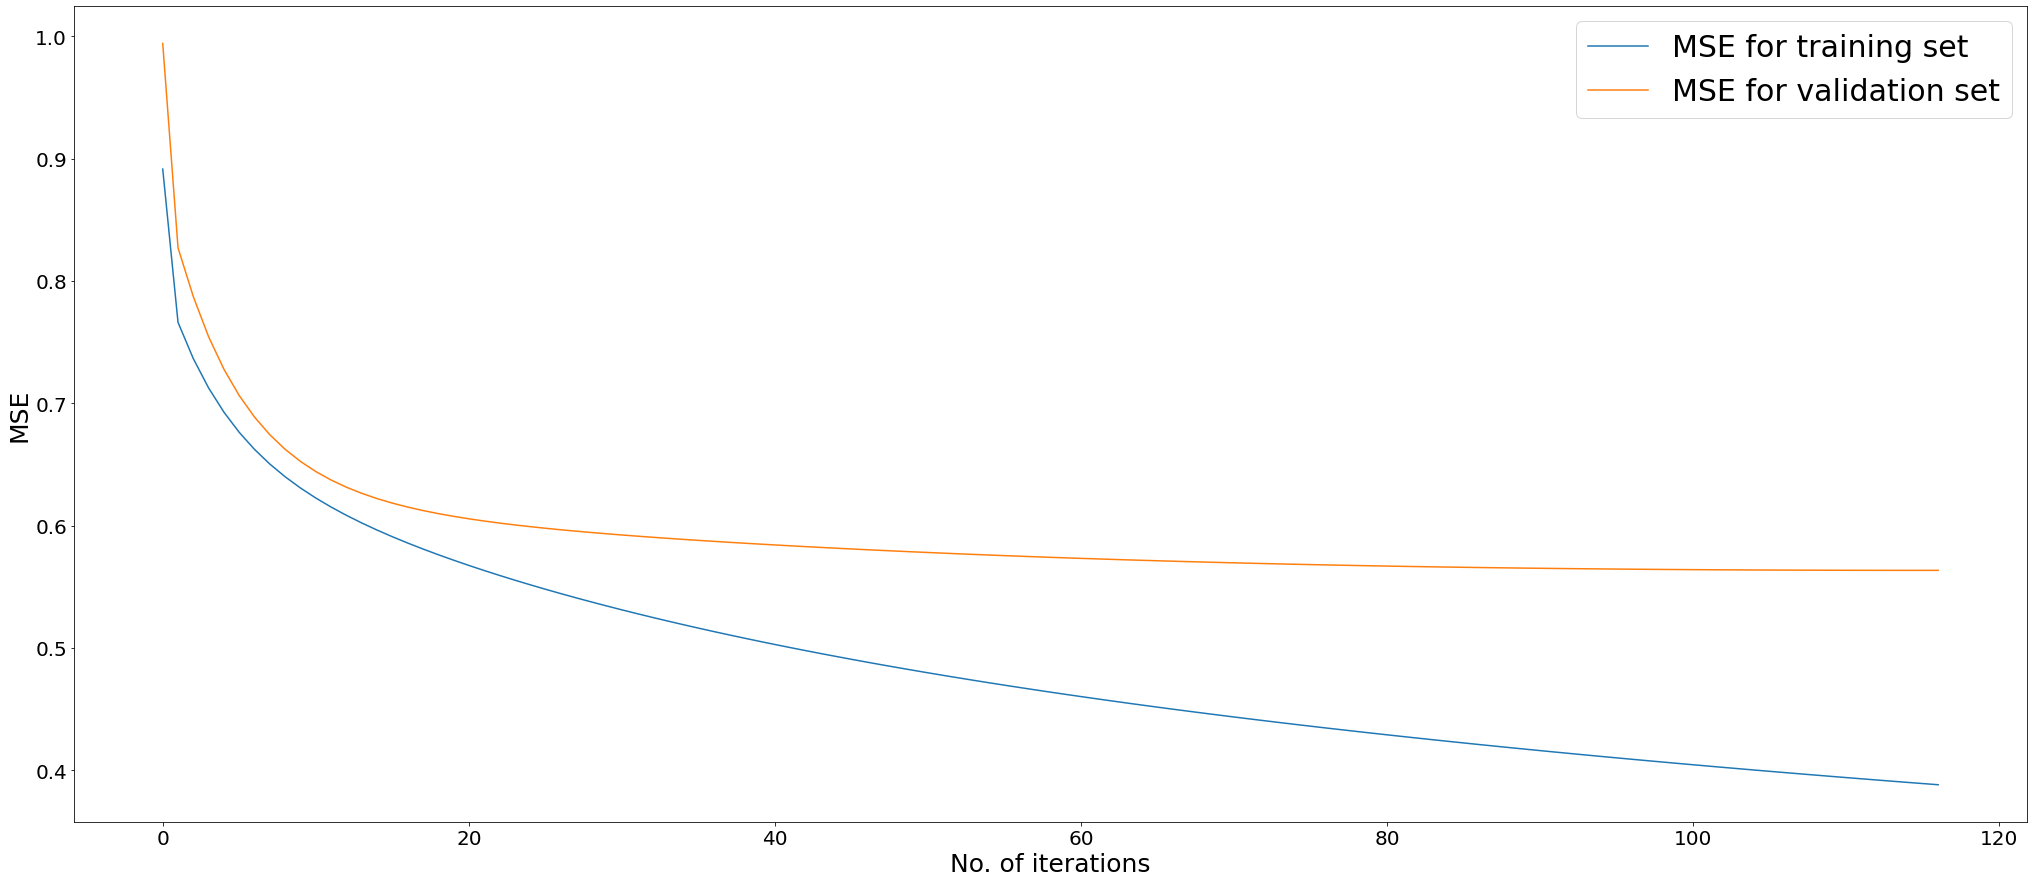

In [10]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Task 2

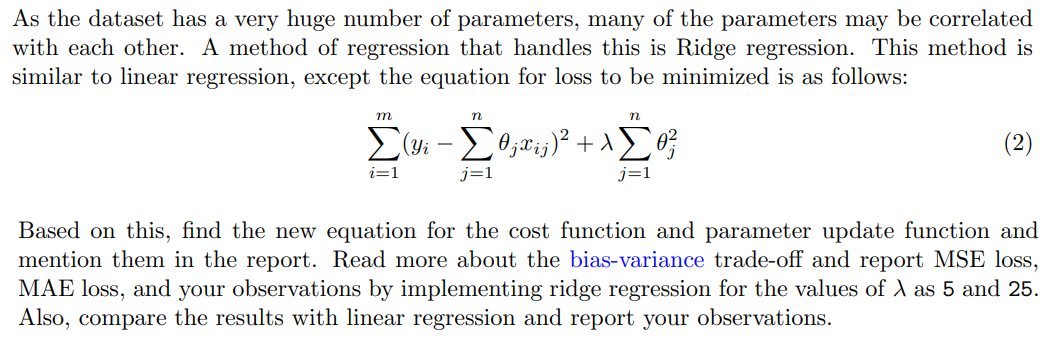

In [11]:
'''
    @input params
        Training Data
            X_t, y_t
        Validation Data
            X_v, y_v
        steps     : learning rates
        max_it    : max no. of iteration
        reltol    : threshold w.r.t relative change in cost function of validation data
        threshold : threshold w.r.t to square error in training data
        
    @output params
        w     : weights
        MSE_t : MSE of training data in each iteration
        MSE_v : MSE of validation data in each iteration
'''
def ridge_gradient_descent(X_t, y_t, X_v, y_v, lamda, steps, max_it, reltol, threshold):
    
    #Initalising Parameters
    N_t = X_t.shape[0]
    N_v = X_v.shape[0]
    d1 = X_t.shape[1]
    theta = np.zeros([d1,1])
#     theta = np.random.rand(d1,1)/10
    XT = np.transpose(X_t)
    XT_X = np.matmul(XT,X_t)
    
    MSE_t = []
    MSE_v = []
   
    # Iterative loop for minimizing cost function i.e. MSE     
    for i in tqdm.tqdm(range(0,max_it)):
        
        # calculating gradient
        grad = 2*(np.matmul(XT_X, theta) - np.matmul(XT, y_t) + lamda*theta)
#         norm_grad = grad/np.sqrt(np.sum(grad**2))
        norm_grad = grad
        
        # updating weights    
        theta -= steps*norm_grad
        
        # estimating training error
        e_t = np.matmul(X_t,theta) - y_t
        MSEin_t = np.matmul(np.transpose(e_t),e_t)[0][0] + lamda*(theta.T@theta)[0][0]
#         MSEin_t = np.matmul(np.transpose(e_t),e_t)[0][0]
#         MSEin_t = np.sum(e_t**2) + np.sum(theta**2)
        MSE_t.append(MSEin_t)
        
        # estimating validation error
        e_v = np.matmul(X_v,theta) - y_v
        MSEin_v = np.matmul(np.transpose(e_v),e_v)[0][0] + lamda*(theta.T@theta)[0][0]
#         MSEin_v = np.matmul(np.transpose(e_v),e_v)[0][0]
#         MSEin_v = np.sum(e_v**2) + np.sum(theta**2)
        MSE_v.append(MSEin_v)
        
        # going out from loop if threshold has reached
        if(i > 1):
            if(np.abs(MSE_v[-2] - MSEin_v)/MSE_v[-2]<reltol):
                print(np.abs(MSE_v[-2] - MSEin_v)/MSE_v[-2])
                break
            
    
    return theta, MSE_t, MSE_v

In [12]:
theta, rMSE_t, rMSE_v = ridge_gradient_descent(X_train, y_train, X_validation, y_validation, 50, 0.00001, 5000, 1e-5, 0)

 58%|████████████████████████████████▊                        | 2882/5000 [00:04<00:03, 688.87it/s]

9.987909994444555e-06


In [13]:
rmse_train = np.sum((X_train@theta-y_train)**2)/X_train.shape[0]
rmae_train = np.sum(np.abs(X_train@theta-y_train))/X_train.shape[0]

print("MSE for training set: ", rmse_train)
print("MAE for training set: ", rmae_train)

rmse_validation = np.sum((X_validation@theta-y_validation)**2)/X_validation.shape[0]
rmae_validation = np.sum(np.abs(X_validation@theta-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", rmse_validation)
print("MAE for validation set: ", rmae_validation)

MSE for training set:  0.14078405581002776
MAE for training set:  0.2956373406631072
MSE for validation set:  0.7272813402887988
MAE for validation set:  0.6567918595180867


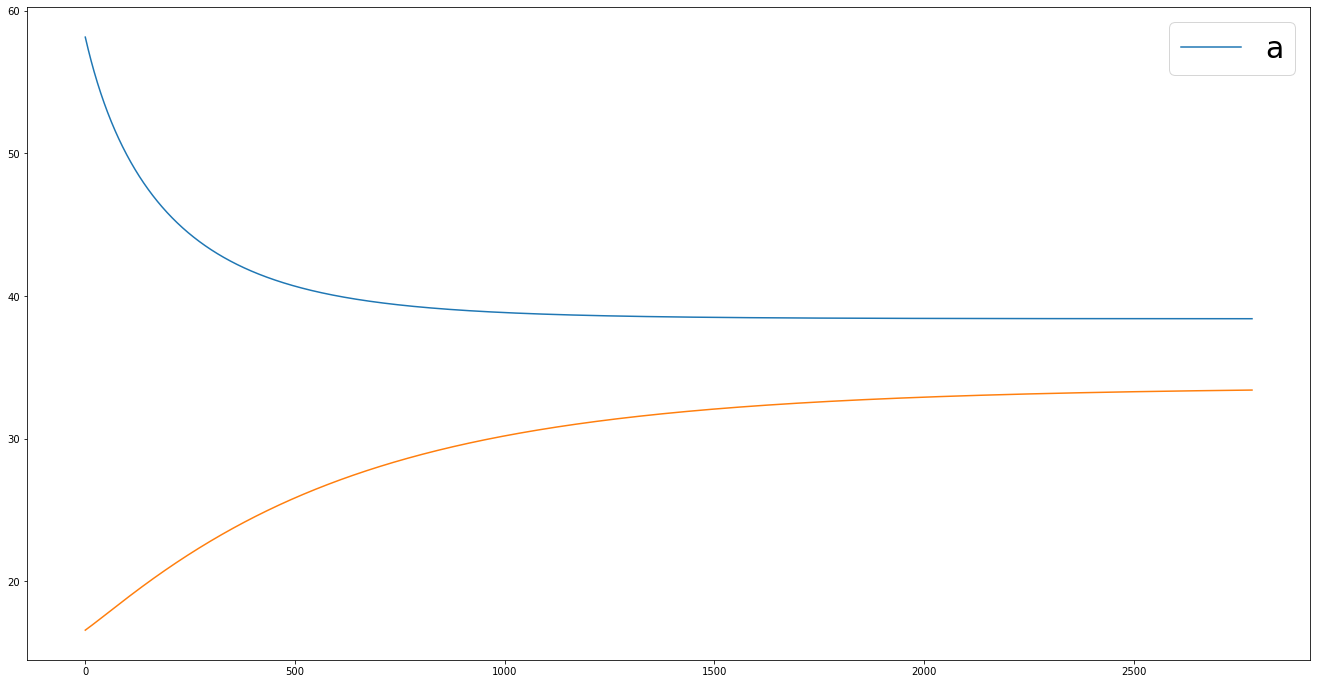

In [14]:
fig, ax = plt.subplots(figsize=(23,12))
plt.plot(rMSE_t[100:], label ="a")
plt.plot(rMSE_v[100:])
leg = ax.legend();
plt.show()

In [15]:
# Determining optimal value of lambda
msev = []
mset = []
for l in range(100,2000,100):
    print(f'i={l}')
    theta, rMSE_t, rMSE_v = ridge_gradient_descent(X_train, y_train, X_validation, y_validation, l, 0.00001, 5000, 1e-5, 0)
    rmse_train = np.sum((X_train@theta-y_train)**2)/X_train.shape[0]
    rmae_train = np.sum(np.abs(X_train@theta-y_train))/X_train.shape[0]

    print("MSE for training set: ", rmse_train)
    print("MAE for training set: ", rmae_train)

    rmse_validation = np.sum((X_validation@theta-y_validation)**2)/X_validation.shape[0]
    rmae_validation = np.sum(np.abs(X_validation@theta-y_validation))/X_validation.shape[0]

    print("MSE for validation set: ", rmse_validation)
    print("MAE for validation set: ", rmae_validation)
    
    msev.append(rmse_validation)
    mset.append(rmse_train)

i=100


 36%|████████████████████▌                                    | 1806/5000 [00:02<00:04, 682.11it/s]


9.987236220599702e-06
MSE for training set:  0.21344084279551634
MAE for training set:  0.3684382212808522
MSE for validation set:  0.6522297028144303
MAE for validation set:  0.6154706104461083
i=200


 21%|████████████                                             | 1059/5000 [00:01<00:05, 687.49it/s]


9.96744219693907e-06
MSE for training set:  0.29191365598392605
MAE for training set:  0.4327383894875293
MSE for validation set:  0.5995082476858465
MAE for validation set:  0.5748661843398869
i=300


 15%|████████▋                                                 | 752/5000 [00:01<00:06, 678.67it/s]


9.962852250484432e-06
MSE for training set:  0.3380217772788727
MAE for training set:  0.46334174920357946
MSE for validation set:  0.5811676819934432
MAE for validation set:  0.5679993834862612
i=400


 12%|██████▊                                                   | 583/5000 [00:00<00:06, 676.16it/s]


9.905968470244812e-06
MSE for training set:  0.3704777207959014
MAE for training set:  0.4825850376703382
MSE for validation set:  0.5741299603715802
MAE for validation set:  0.5684933287139883
i=500


 10%|█████▌                                                    | 475/5000 [00:00<00:06, 671.39it/s]


9.916461023433438e-06
MSE for training set:  0.395535113265624
MAE for training set:  0.4969099261785897
MSE for validation set:  0.5721708411006027
MAE for validation set:  0.5696795421879621
i=600


  8%|████▋                                                     | 400/5000 [00:00<00:06, 681.62it/s]


9.974874440623472e-06
MSE for training set:  0.4159868352335837
MAE for training set:  0.5085322214767389
MSE for validation set:  0.5728666895321742
MAE for validation set:  0.571069837394988
i=700


  7%|████                                                      | 346/5000 [00:00<00:06, 698.81it/s]


9.89406003235915e-06
MSE for training set:  0.4333061295807032
MAE for training set:  0.5178284243822054
MSE for validation set:  0.5750798615455347
MAE for validation set:  0.5724696598120209
i=800


  6%|███▌                                                      | 304/5000 [00:00<00:06, 684.76it/s]


9.964980314442988e-06
MSE for training set:  0.44837541472136105
MAE for training set:  0.525865621265239
MSE for validation set:  0.5782064771839666
MAE for validation set:  0.573798709482558
i=900


  5%|███▏                                                      | 272/5000 [00:00<00:07, 673.36it/s]


9.819212644558907e-06
MSE for training set:  0.46174556082654916
MAE for training set:  0.5329953965046406
MSE for validation set:  0.581909615288096
MAE for validation set:  0.5759632220750881
i=1000


  5%|██▊                                                       | 245/5000 [00:00<00:06, 684.35it/s]


9.941524737210015e-06
MSE for training set:  0.4738090039583891
MAE for training set:  0.5394957795259958
MSE for validation set:  0.5859815166472906
MAE for validation set:  0.5797673537104517
i=1100


  4%|██▌                                                       | 224/5000 [00:00<00:06, 686.27it/s]


9.751251749644403e-06
MSE for training set:  0.4848228267969393
MAE for training set:  0.5455883542560411
MSE for validation set:  0.5903001478011353
MAE for validation set:  0.5833348704579073
i=1200


  4%|██▍                                                       | 205/5000 [00:00<00:07, 678.67it/s]


9.94484795806727e-06
MSE for training set:  0.49500240574229604
MAE for training set:  0.5509682336465933
MSE for validation set:  0.5947810906183822
MAE for validation set:  0.5875062409803621
i=1300


  4%|██▏                                                       | 190/5000 [00:00<00:07, 647.70it/s]


9.794733561327089e-06
MSE for training set:  0.5044828876230768
MAE for training set:  0.5558767142102946
MSE for validation set:  0.5993757420619737
MAE for validation set:  0.5918157375978825
i=1400


  4%|██                                                        | 176/5000 [00:00<00:06, 696.56it/s]


9.995321531216625e-06
MSE for training set:  0.5133969878470519
MAE for training set:  0.5604653404526408
MSE for validation set:  0.6040475102529964
MAE for validation set:  0.5959095303610829
i=1500


  3%|█▉                                                        | 165/5000 [00:00<00:07, 684.82it/s]


9.787847581071085e-06
MSE for training set:  0.521821649827532
MAE for training set:  0.5648178521111085
MSE for validation set:  0.6087756565165465
MAE for validation set:  0.5998106625412484
i=1600


  3%|█▊                                                        | 155/5000 [00:00<00:07, 685.18it/s]


9.707099326157852e-06
MSE for training set:  0.5298432707321657
MAE for training set:  0.5688662192987876
MSE for validation set:  0.6135443161800436
MAE for validation set:  0.6035393439236663
i=1700


  3%|█▋                                                        | 146/5000 [00:00<00:07, 685.24it/s]


9.683849512534518e-06
MSE for training set:  0.5375216027738294
MAE for training set:  0.5728350082931836
MSE for validation set:  0.6183442642645761
MAE for validation set:  0.6071130894550092
i=1800


  3%|█▌                                                        | 138/5000 [00:00<00:07, 686.15it/s]


9.65118453988627e-06
MSE for training set:  0.5449059173518586
MAE for training set:  0.5766392748198795
MSE for validation set:  0.623169556693297
MAE for validation set:  0.6105470367646235
i=1900


  3%|█▌                                                        | 130/5000 [00:00<00:06, 717.69it/s]

9.978122802461354e-06
MSE for training set:  0.552045923018714
MAE for training set:  0.5803818730944271
MSE for validation set:  0.6280174789357078
MAE for validation set:  0.6138551843592142


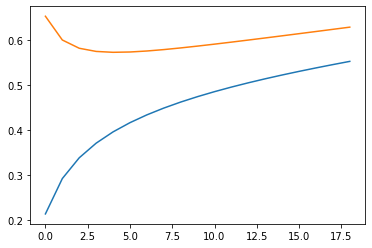

In [16]:
plt.plot(mset)
plt.plot(msev)

## Task 3

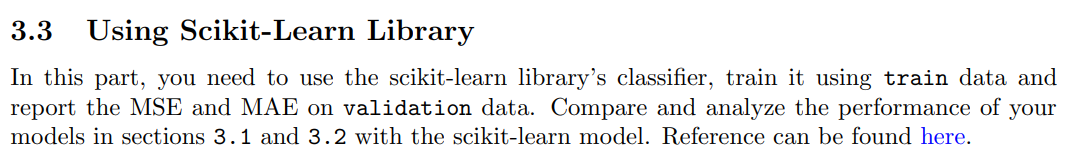

### Linear Regression

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [18]:
yt_pred = regr.predict(X_train)
yv_pred = regr.predict(X_validation)

In [19]:
sk_mse_t = mean_squared_error(y_true=y_train,y_pred=regr.predict(X_train))
sk_mse_v = mean_squared_error(y_true=y_validation,y_pred=regr.predict(X_validation))

print("MSE of training data", sk_mse_t)
print("MAE of training data", mean_absolute_error(y_true=y_train,y_pred=regr.predict(X_train)))

print("MSE of validation data", sk_mse_v)
print("MAE of validation data", mean_absolute_error(y_true=y_validation,y_pred=regr.predict(X_validation)))

MSE of training data 1.950068266356889e-29
MAE of training data 3.2674480405287595e-15
MSE of validation data 1.0250389257038346
MAE of validation data 0.8321567066209573


### Ridge Regression

In [20]:
ridge = Ridge(alpha = 25.0)
ridge.fit(X_train, y_train)

Ridge(alpha=25.0)

In [21]:
sk_rmse_t = mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train))
sk_rmse_v = mean_squared_error(y_true=y_validation,y_pred=ridge.predict(X_validation))

print("MSE of training data", sk_rmse_t)
print("MAE of training data", mean_absolute_error(y_true=y_train,y_pred=ridge.predict(X_train)))
print("MSE of validation data", sk_rmse_v)
print("MAE of validation data", mean_absolute_error(y_true=y_validation,y_pred=ridge.predict(X_validation)))

MSE of training data 0.07889479445302967
MAE of training data 0.21908708605980468
MSE of validation data 0.7716855647949752
MAE of validation data 0.6815982994230617


## Task 4

In [22]:
X_comb = np.vstack((X_train, X_validation))
y_comb = np.vstack((y_train, y_validation))
X_new = SelectKBest( mutual_info_regression, k=10).fit_transform(X_comb, np.ravel(y_comb))

### SelectKBest method

In [23]:
X_new.shape

(165, 10)

In [24]:
X_train_new = X_new[0:144,:]
X_train_new.shape

(144, 10)

In [25]:
X_valid_new = X_new[144:,:]
X_valid_new.shape

(21, 10)

In [26]:
w4, MSE_t4, MSE_v4, MSE_relative4 = gradient_descent_withE(X_train_new, y_train, X_valid_new, y_validation, 0.001, 100000, 1e-6, 0)

 14%|███████▍                                            | 14191/100000 [00:00<00:02, 40065.03it/s]

9.999304221837521e-07


In [27]:
mse_train = np.sum((X_train_new@w4-y_train)**2)/X_train.shape[0]
mae_train = np.sum(np.abs(X_train_new@w4-y_train))/X_train.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_valid_new@w4-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_valid_new@w4-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  2.0846069287746
MAE for training set:  1.1661018395231784
MSE for validation set:  1.9729599805557105
MAE for validation set:  1.2022666333647436


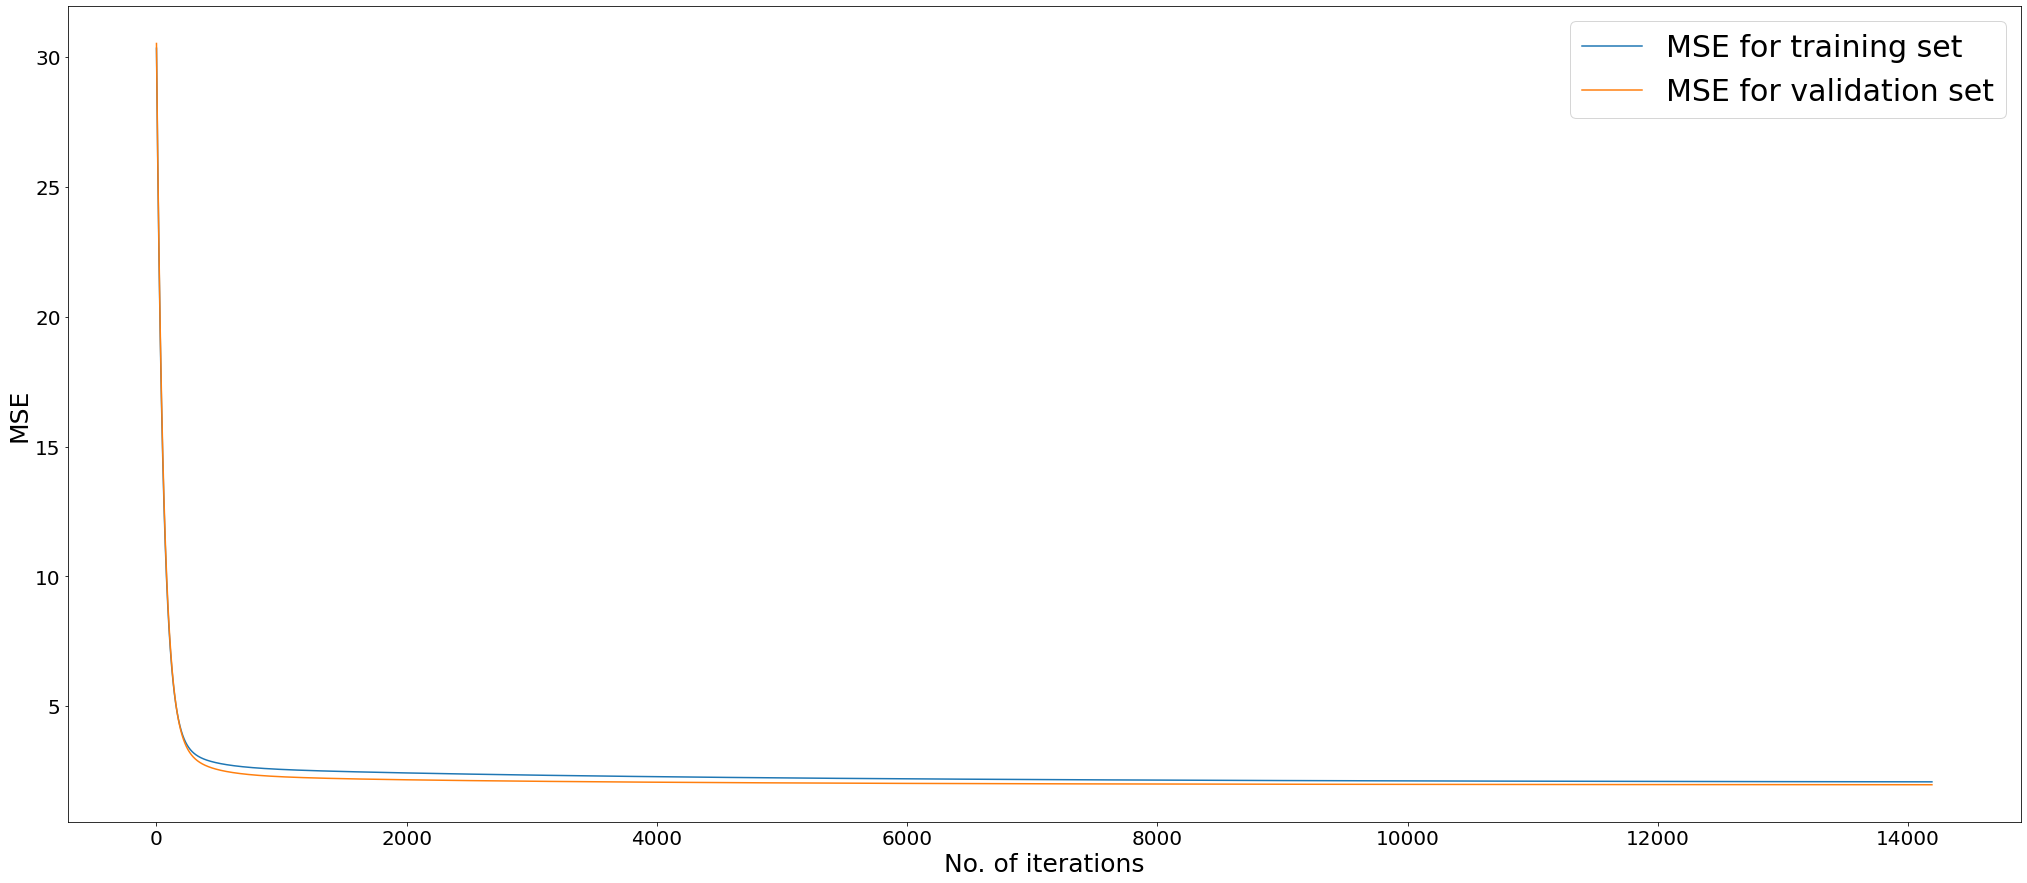

In [28]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t4[0:], label = "MSE for training set")
ax.plot(MSE_v4[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [29]:
lr = LinearRegression()
lr.fit(X_train_new, y_train)

LinearRegression()

In [30]:
sk_mse_t = mean_squared_error(y_true=y_train,y_pred=lr.predict(X_train_new))
sk_mse_v = mean_squared_error(y_true=y_validation,y_pred=lr.predict(X_valid_new))

print("MSE of training data", sk_mse_t)
print("MAE of training data", mean_absolute_error(y_true=y_train,y_pred=lr.predict(X_train_new)))

print("MSE of validation data", sk_mse_v)
print("MAE of validation data", mean_absolute_error(y_true=y_validation,y_pred=lr.predict(X_valid_new)))

MSE of training data 0.6718172055533514
MAE of training data 0.665565386949834
MSE of validation data 0.7740611770410544
MAE of validation data 0.6513784102853785


### SelectFromModel method

In [31]:
rr = Ridge()
rr.fit(X_train, y_train)

Ridge()

In [32]:
modelsel = SelectFromModel(rr, threshold=None, max_features=10)
modelsel.fit(X_comb, y_comb)
top10 = modelsel.transform(X_comb)

In [33]:
top10.shape

(165, 10)

In [34]:
X_train_newr = X_new[0:144,:]
X_train_newr.shape

(144, 10)

In [35]:
X_valid_newr = X_new[144:,:]
X_valid_newr.shape

(21, 10)

In [36]:
w4, MSE_t4, MSE_v4, MSE_relative4 = gradient_descent_withE(X_train_newr, y_train, X_valid_newr, y_validation, 0.001, 100000, 1e-6, 0)

 14%|███████▍                                            | 14191/100000 [00:00<00:02, 37762.24it/s]

9.999304221837521e-07


In [37]:
mse_train = np.sum((X_train_newr@w4-y_train)**2)/X_train.shape[0]
mae_train = np.sum(np.abs(X_train_newr@w4-y_train))/X_train.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_valid_newr@w4-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_valid_newr@w4-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  2.0846069287746
MAE for training set:  1.1661018395231784
MSE for validation set:  1.9729599805557105
MAE for validation set:  1.2022666333647436


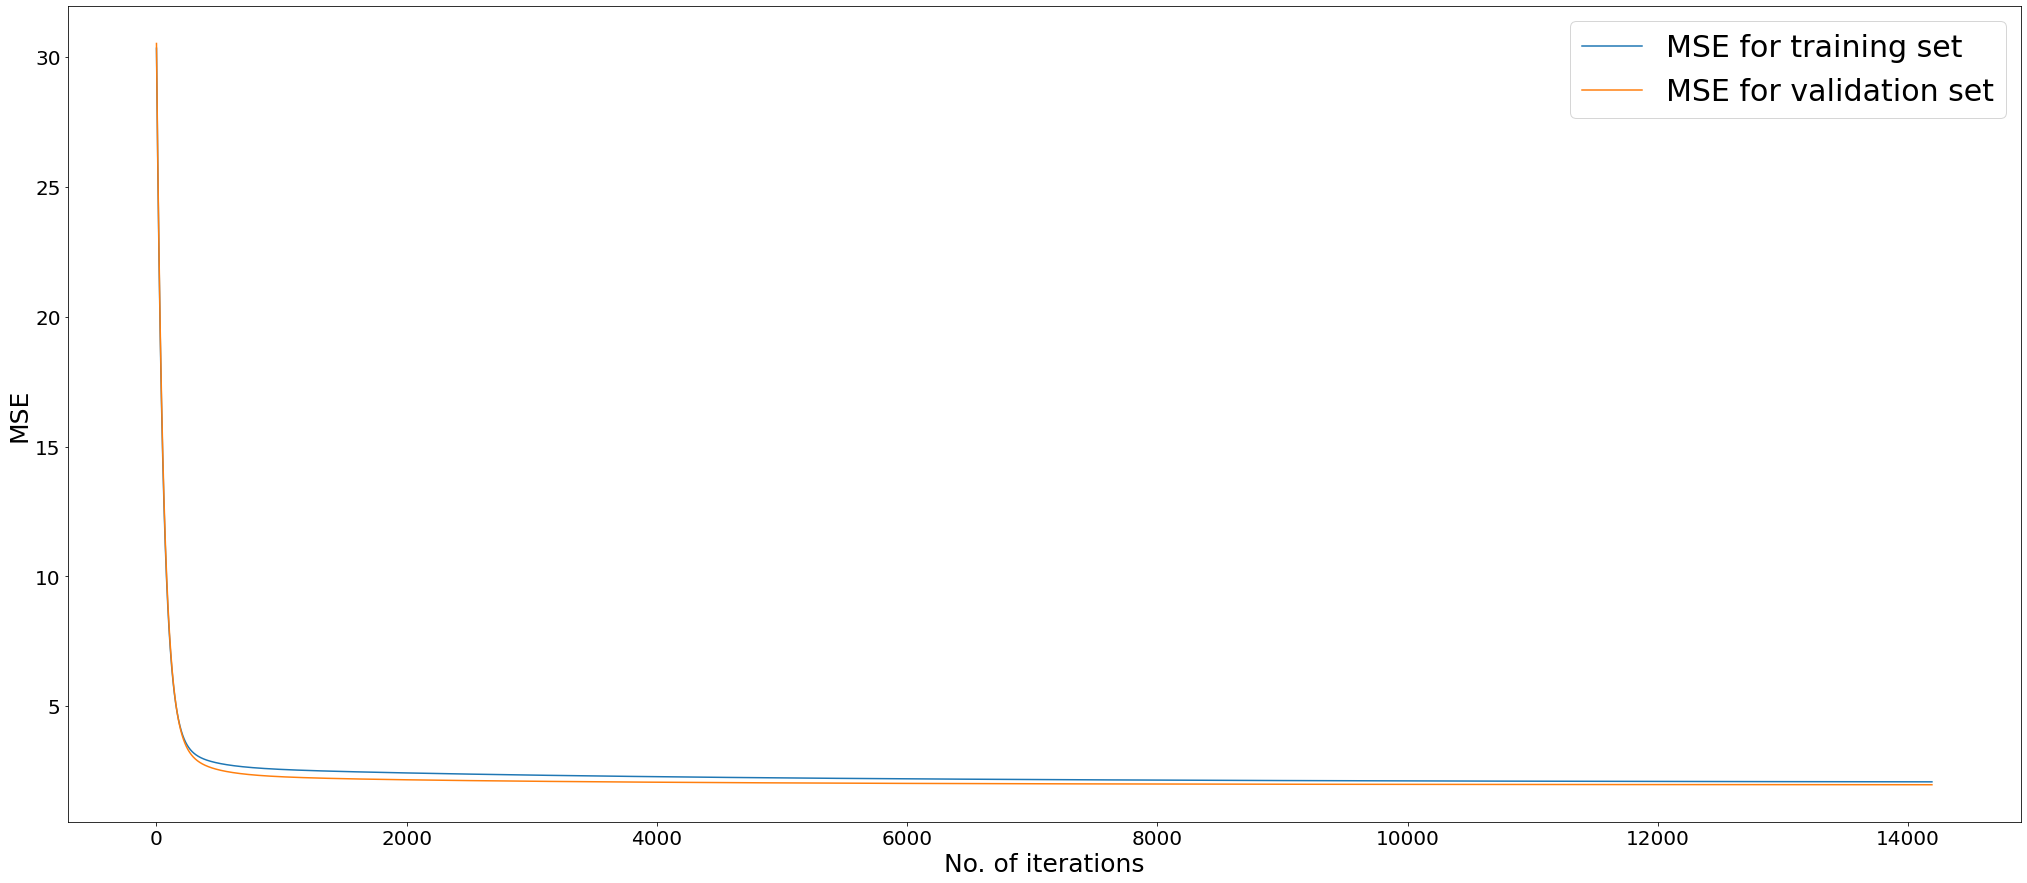

In [38]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t4[0:], label = "MSE for training set")
ax.plot(MSE_v4[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Task 5

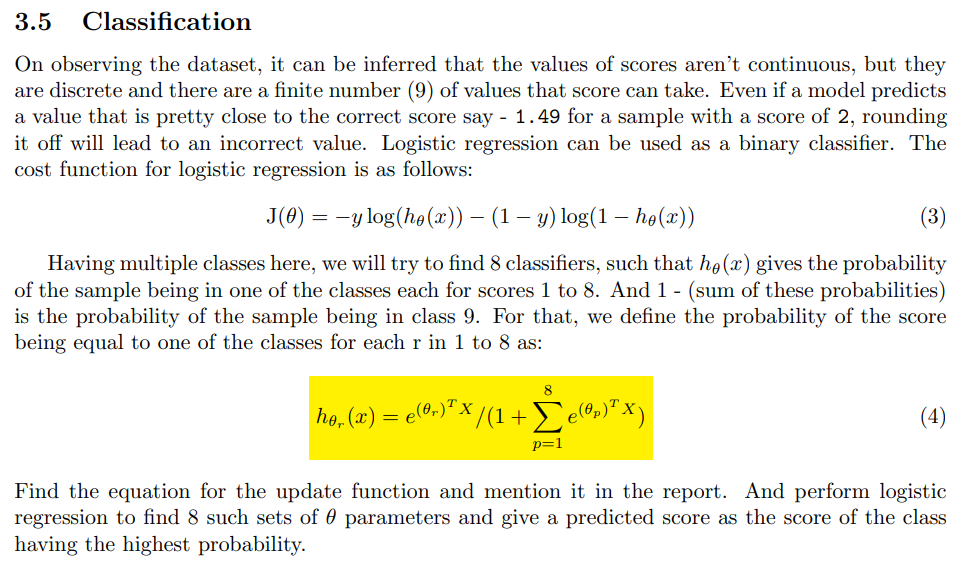

In [39]:
def get_prob(X, theta):
    B = np.exp(np.matmul(X, theta) - np.max(np.matmul(X, theta)))
    norm = np.reshape((np.exp(-np.max(np.matmul(X, theta)))+np.sum(B, axis = 1)), (B.shape[0],1))
    B = B/norm
    return B

def getH(y_train, k):
    H = np.repeat(y_train, k, axis = 1)
    for i in range(1, k+1):
        H[H[:,i-1] !=i ,i-1] = 0
        H[:,i-1]=H[:,i-1]/i
    return H

def predict_classification(X, theta):
    prob = get_prob(X,theta)
    prob = np.hstack((prob, np.reshape((1-np.sum(prob, axis = 1)),(prob.shape[0],1))))
    return np.argmax(prob, axis=1)+1

def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)
'''
    @input params
        Training Data
            X_t, y_t
        Validation Data
            X_v, y_v
        steps     : learning rates
        max_it    : max no. of iteration
        reltol    : threshold w.r.t relative change in cost function of validation data
        
    @output params
        w     : weights
        J_t : Cost function of training data in each iteration
        J_v : Cost of validation data in each iteration
'''
def classification_gradient_descent1(X_t, y_t, X_v, y_v, steps, max_it, reltol):
    
    #Initalising Parameters
    N = X_t.shape[0]
    d1 = X_t.shape[1]
    
    k = len(np.unique(y_train))-1
    
#     theta = np.random.random((d1,k))
    theta = np.zeros((d1,k))
    print(theta.shape)
    
        
    J_t = []
    J_v = []
    
    H = getH(y_t, k)
    H_v = getH(y_v, k)
    
    for i in tqdm.tqdm(range(0, max_it)):  
        
        h_theta = get_prob(X_t,theta)
        # calcuate gradient
        grad = X_t.T@(h_theta - H)
#         grad /= np.sqrt(np.sum(grad**2, axis = 0))
        # weight update
        theta -= steps*grad
        
        # Cost Functions
        ## Train set
        J_ti = -np.sum(H*(np.log(h_theta)))
        J_t.append(J_ti)
        
        ## Validation set
        J_vi = -np.sum(H_v*(np.log(get_prob(X_v,theta))))
        J_v.append(J_vi)
        
        # going out from loop if validation cost function change is slow
        if(i > 1):
            if(np.abs(J_v[-2] - J_vi)/J_v[-2]<reltol):
                print(np.abs(J_v[-2] - J_vi)/J_v[-2])
                break
                
    return theta, J_t, J_v

In [40]:
theta, J_t, J_v = classification_gradient_descent1(X_train, y_train, X_validation, y_validation, 0.001, 5000, 1e-6)

(2049, 8)


  7%|███▉                                                     | 342/5000 [00:00<00:02, 1841.14it/s]

4.850510104258999e-07


In [41]:
print(accuracy(y_train.ravel(), predict_classification(X_train, theta)))

1.0


In [42]:
print(accuracy(y_validation.ravel(), predict_classification(X_validation, theta)))

0.47619047619047616


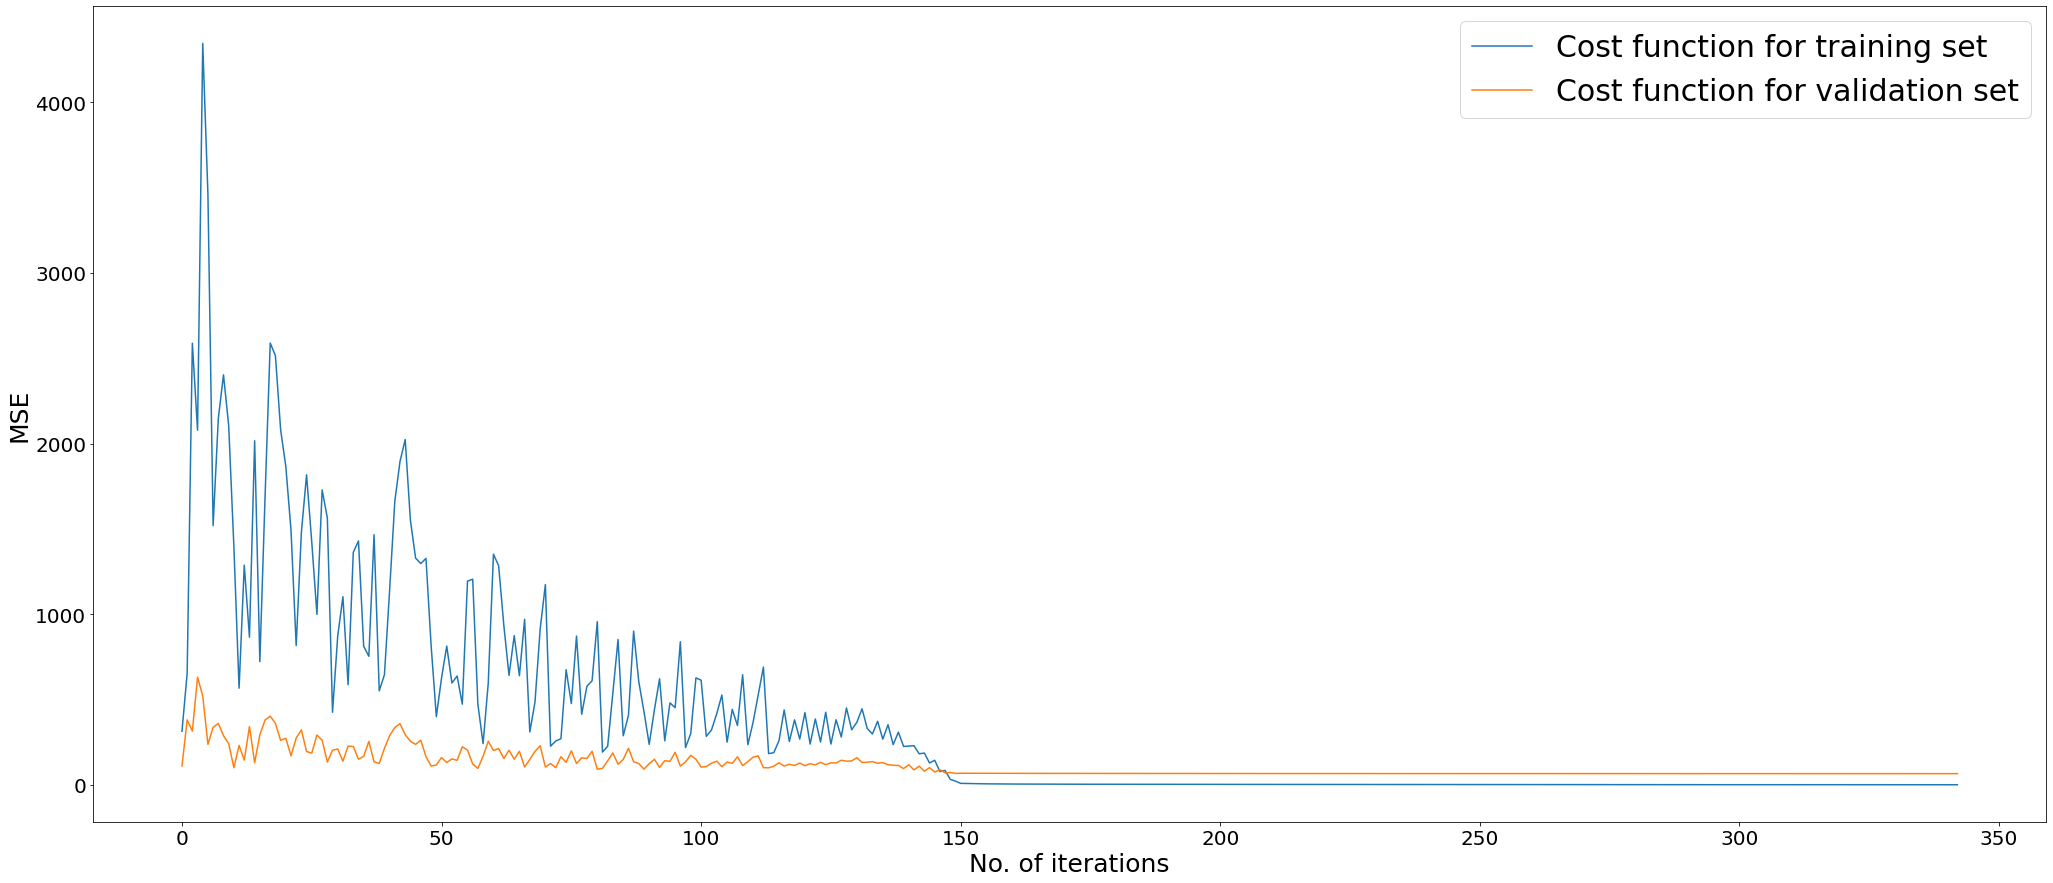

In [43]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(J_t[0:], label = "Cost function for training set")
ax.plot(J_v[0:], label = "Cost function for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [44]:
# Learning rate 0.01, reltol 1e-4
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.42857142857142855


# Learning rate 0.005, reltol 1e-4
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.42857142857142855

# Learning rate 0.005, reltol 1e-6
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.47619047619047616

# Learning rate 0.001, reltol 1e-4
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.42857142857142855


# Learning rate 0.001, reltol 1e-6
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.47619047619047616


# Learning rate 0.0005, reltol 1e-5
# accuracy(y_train.ravel(), y_pt)
# 0.9930555555555556
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.47619047619047616


# Learning rate 0.0001, reltol 1e-5
# accuracy(y_train.ravel(), y_pt)
# 0.8611111111111112
 
# accuracy(y_validation.ravel(), predict_classification(X_validation, theta))
# 0.5238095238095238

## Task 6

### Normalization Part
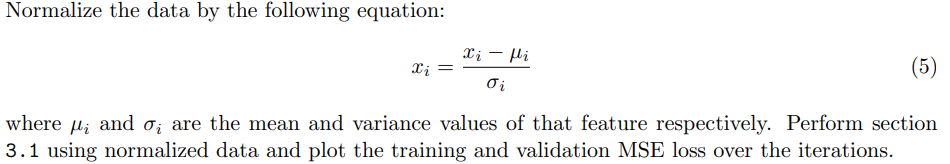

In [45]:
# Normalizing Dataset
featurest_mean = np.mean(features_train, axis = 0)
featurest_std = np.std(features_train, axis = 0)

Xv_mean = np.mean(X_validation, axis = 0)
Xv_std = np.std(X_validation, axis = 0)

In [46]:
def normalize(X, mean, std):
    return (X - mean)/std

In [47]:
Xt_norm = np.hstack((np.ones((np.shape(features_train)[0],1)), normalize(features_train, featurest_mean, featurest_std)))

In [48]:
Xv_norm = np.hstack((np.ones((np.shape(features_validation)[0],1)), normalize(features_validation, featurest_mean, featurest_std)))

In [49]:
for i in [0.0003, 0.0001, 0.007, 0.005, 0.05, 0.5]:
    w_norm, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt_norm, y_train, Xv_norm, y_validation, i, 50000, 1e-6, 0)
    
    print(f'Training for learning rate {i}')
    norm_mse_train = np.sum((Xt_norm@w_norm-y_train)**2)/Xt_norm.shape[0]
    norm_mae_train = np.sum(np.abs(Xt_norm@w_norm-y_train))/Xt_norm.shape[0]

    print("MSE for training set: ", norm_mse_train)
    print("MAE for training set: ", norm_mae_train)
    

    norm_mse_v = np.sum((Xv_norm@w_norm-y_validation)**2)/Xv_norm.shape[0]
    norm_mae_v = np.sum(np.abs(Xv_norm@w_norm-y_validation))/Xv_norm.shape[0]

    print("MSE for validation set: ", norm_mse_v)
    print("MAE for validation set: ", norm_mae_v)
    print(f"MSE min {np.min(MSE_v)}")

 27%|██████████████▊                                        | 13478/50000 [00:19<00:51, 702.44it/s]


9.999784697974897e-07
Training for learning rate 0.0003
MSE for training set:  2.8219981933345496e-06
MAE for training set:  0.0016396868907272563
MSE for validation set:  0.9035965314436206
MAE for validation set:  0.7302563393385506
MSE min 0.9035965314436206


 70%|██████████████████████████████████████▍                | 34887/50000 [00:49<00:21, 697.99it/s]


9.998905014060954e-07
Training for learning rate 0.0001
MSE for training set:  2.551680163773695e-05
MAE for training set:  0.004983012566675154
MSE for validation set:  0.9066456871451026
MAE for validation set:  0.7317273753626498
MSE min 0.9066456871451026


  0%|▏                                                        | 155/50000 [00:00<01:10, 711.13it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:49: RuntimeWarning: overflow encountered in matmul
  MSEin_t = 1/N_t*np.matmul(np.transpose(e_t),e_t)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:55: RuntimeWarning: overflow encountered in matmul
  MSEin_v = 1/N_v*np.matmul(np.transpose(e_v),e_v)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:61: RuntimeWarning: invalid value encountered in double_scalars
  MSE_relative.append(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:62: RuntimeWarning: invalid value encountered in double_scalars
  if(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v<reltol):
  1%|▍                                                        | 383/50000 [00:00<01:11, 696.58it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:41: RuntimeWarning: over

Training for learning rate 0.007
MSE for training set:  nan
MAE for training set:  nan
MSE for validation set:  nan
MAE for validation set:  nan
MSE min nan


100%|███████████████████████████████████████████████████████| 50000/50000 [01:15<00:00, 660.08it/s]


Training for learning rate 0.005
MSE for training set:  nan
MAE for training set:  nan
MSE for validation set:  nan
MAE for validation set:  nan
MSE min nan


100%|███████████████████████████████████████████████████████| 50000/50000 [01:15<00:00, 664.22it/s]


Training for learning rate 0.05
MSE for training set:  nan
MAE for training set:  nan
MSE for validation set:  nan
MAE for validation set:  nan
MSE min nan


  0%|                                                          | 63/50000 [00:00<01:23, 599.03it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:48: RuntimeWarning: overflow encountered in matmul
  e_t = np.matmul(X_t,w) - y_t
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:54: RuntimeWarning: overflow encountered in matmul
  e_v = np.matmul(X_v,w) - y_v
100%|███████████████████████████████████████████████████████| 50000/50000 [01:13<00:00, 679.82it/s]

Training for learning rate 0.5
MSE for training set:  nan
MAE for training set:  nan
MSE for validation set:  nan
MAE for validation set:  nan
MSE min nan


In [50]:
for i in [0.003, 0.001, 0.03, 0.01, 0.3, 0.1]:
    w_norm, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt_norm, y_train, Xv_norm, y_validation, i, 50000, 1e-6, 0)
    
    print(f'Training for learning rate {i}')
    norm_mse_train = np.sum((Xt_norm@w_norm-y_train)**2)/Xt_norm.shape[0]
    norm_mae_train = np.sum(np.abs(Xt_norm@w_norm-y_train))/Xt_norm.shape[0]

    print("MSE for training set: ", norm_mse_train)
    print("MAE for training set: ", norm_mae_train)

    norm_mse_v = np.sum((Xv_norm@w_norm-y_validation)**2)/Xv_norm.shape[0]
    norm_mae_v = np.sum(np.abs(Xv_norm@w_norm-y_validation))/Xv_norm.shape[0]

    print("MSE for training set: ", norm_mse_v)
    print("MAE for training set: ", norm_mae_v)
    
    

  1%|▋                                                        | 604/50000 [00:00<01:11, 692.42it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:49: RuntimeWarning: overflow encountered in matmul
  MSEin_t = 1/N_t*np.matmul(np.transpose(e_t),e_t)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:55: RuntimeWarning: overflow encountered in matmul
  MSEin_v = 1/N_v*np.matmul(np.transpose(e_v),e_v)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:61: RuntimeWarning: invalid value encountered in double_scalars
  MSE_relative.append(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:62: RuntimeWarning: invalid value encountered in double_scalars
  if(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v<reltol):
  3%|█▍                                                      | 1251/50000 [00:01<01:12, 670.74it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:41: RuntimeWarning: over

Training for learning rate 0.003
MSE for training set:  nan
MAE for training set:  nan
MSE for training set:  nan
MAE for training set:  nan


  9%|█████▏                                                  | 4653/50000 [00:06<01:03, 709.76it/s]


9.99521641858553e-07
Training for learning rate 0.001
MSE for training set:  2.5304616518256616e-07
MAE for training set:  0.00048348620920674816
MSE for training set:  0.902524557518218
MAE for training set:  0.7297397622273041


100%|███████████████████████████████████████████████████████| 50000/50000 [01:13<00:00, 680.07it/s]


Training for learning rate 0.03
MSE for training set:  nan
MAE for training set:  nan
MSE for training set:  nan
MAE for training set:  nan


100%|███████████████████████████████████████████████████████| 50000/50000 [01:16<00:00, 652.14it/s]


Training for learning rate 0.01
MSE for training set:  nan
MAE for training set:  nan
MSE for training set:  nan
MAE for training set:  nan


100%|███████████████████████████████████████████████████████| 50000/50000 [01:11<00:00, 701.47it/s]


Training for learning rate 0.3
MSE for training set:  nan
MAE for training set:  nan
MSE for training set:  nan
MAE for training set:  nan


100%|███████████████████████████████████████████████████████| 50000/50000 [01:10<00:00, 706.40it/s]


Training for learning rate 0.1
MSE for training set:  nan
MAE for training set:  nan
MSE for training set:  nan
MAE for training set:  nan


In [51]:
# learing rate = 0.01
w_norm, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt_norm, y_train, Xv_norm, y_validation, 0.1, 80, 1e-6, 0)

 74%|████████████████████████████████████████████▉                | 59/80 [00:00<00:00, 572.72it/s]C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:49: RuntimeWarning: overflow encountered in matmul
  MSEin_t = 1/N_t*np.matmul(np.transpose(e_t),e_t)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:55: RuntimeWarning: overflow encountered in matmul
  MSEin_v = 1/N_v*np.matmul(np.transpose(e_v),e_v)[0][0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:61: RuntimeWarning: invalid value encountered in double_scalars
  MSE_relative.append(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\1373249367.py:62: RuntimeWarning: invalid value encountered in double_scalars
  if(np.abs(MSE_v[-2] - MSEin_v)/MSEin_v<reltol):
100%|█████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 563.98it/s]


In [52]:
norm_mse_train = np.sum((Xt_norm@w_norm-y_train)**2)/Xt_norm.shape[0]
norm_mae_train = np.sum(np.abs(Xt_norm@w_norm-y_train))/Xt_norm.shape[0]

print("MSE for training set: ", round(norm_mse_train,10))
print("MAE for training set: ", round(norm_mae_train,5))

norm_mse_v = np.sum((Xv_norm@w_norm-y_validation)**2)/Xv_norm.shape[0]
norm_mae_v = np.sum(np.abs(Xv_norm@w_norm-y_validation))/Xv_norm.shape[0]

print("MSE for validation set: ", round(norm_mse_v,5))
print("MAE for validation set: ", round(norm_mae_v,5))

MSE for training set:  inf
MAE for training set:  1.3750329567762443e+156
MSE for validation set:  inf
MAE for validation set:  1.2965007714714308e+156


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\3544739265.py:1: RuntimeWarning: overflow encountered in square
  norm_mse_train = np.sum((Xt_norm@w_norm-y_train)**2)/Xt_norm.shape[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\3544739265.py:7: RuntimeWarning: overflow encountered in square
  norm_mse_v = np.sum((Xv_norm@w_norm-y_validation)**2)/Xv_norm.shape[0]


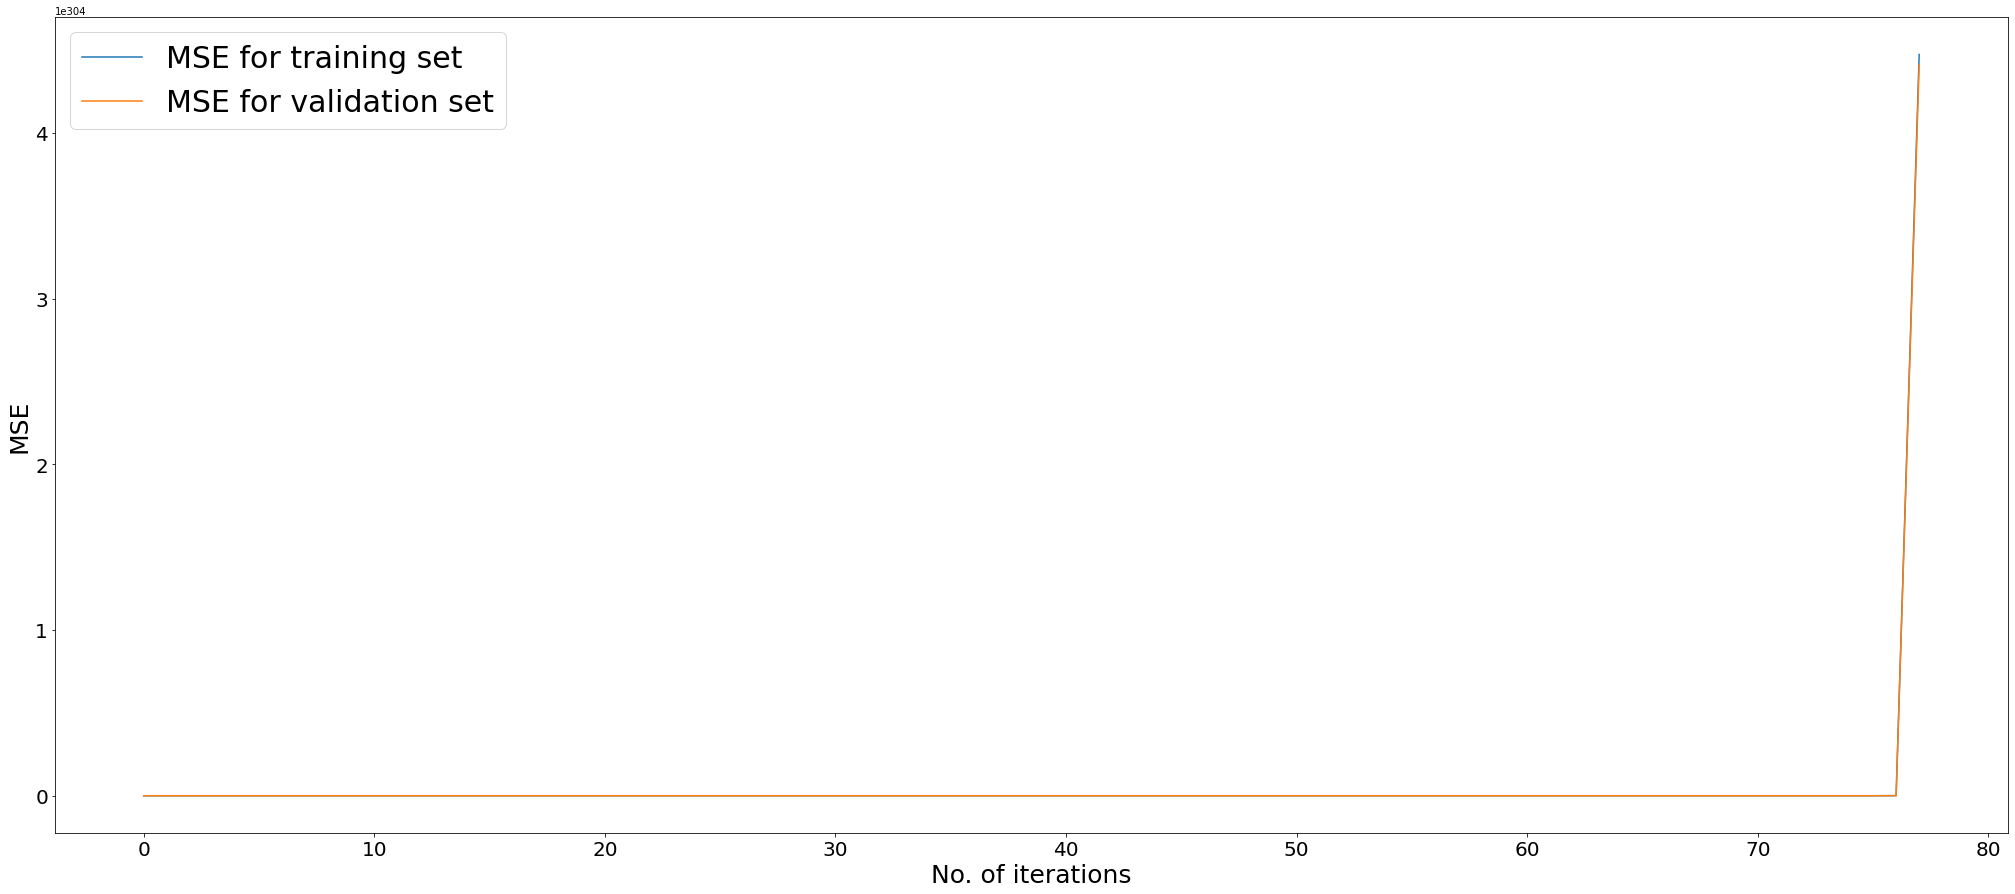

In [53]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [54]:
lr = LinearRegression()
lr.fit(Xt_norm, y_train)

sk_mse_t = mean_squared_error(y_true=y_train,y_pred=lr.predict(Xt_norm))
sk_mse_v = mean_squared_error(y_true=y_validation,y_pred=lr.predict(Xv_norm))

print("MSE of training data", sk_mse_t)
print("MAE of training data", mean_absolute_error(y_true=y_train,y_pred=lr.predict(Xt_norm)))

print("MSE of validation data", sk_mse_v)
print("MAE of validation data", mean_absolute_error(y_true=y_validation,y_pred=lr.predict(Xv_norm)))

MSE of training data 2.2286690122676259e-29
MAE of training data 3.870360821957143e-15
MSE of validation data 0.9012126362439177
MAE of validation data 0.7291315462441174


### Regression in smaller chunks of Training dataset </br>
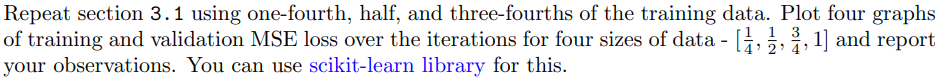

In [55]:
## Random selection for one-fourth of data
df = df_train.sample(n=X_train.shape[0]//4,replace=True)
# Extracting data from dataframes to array
sample_name_13 = df[0].to_numpy()
y_13 = df[1].to_numpy()
y_13 = np.reshape(y_13,(y_13.shape[0],1))
features_13 = df.iloc[:,2:].to_numpy()

Xt1_3 = np.hstack((np.ones((np.shape(features_13)[0],1)), features_13))

In [56]:
w_13, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt1_3, y_13, X_validation, y_validation, 0.001, 10000, 1e-5, 0)

mse_train = np.sum((Xt1_3@w_13-y_13)**2)/Xt1_3.shape[0]
mae_train = np.sum(np.abs(Xt1_3@w_13-y_13))/Xt1_3.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w_13-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w_13-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

 10%|█████▍                                                   | 956/10000 [00:01<00:11, 776.14it/s]

9.96420327670682e-06
MSE for training set:  0.0010518659236864363
MAE for training set:  0.022342931230622493
MSE for validation set:  0.6583875013924484
MAE for validation set:  0.571947195334362


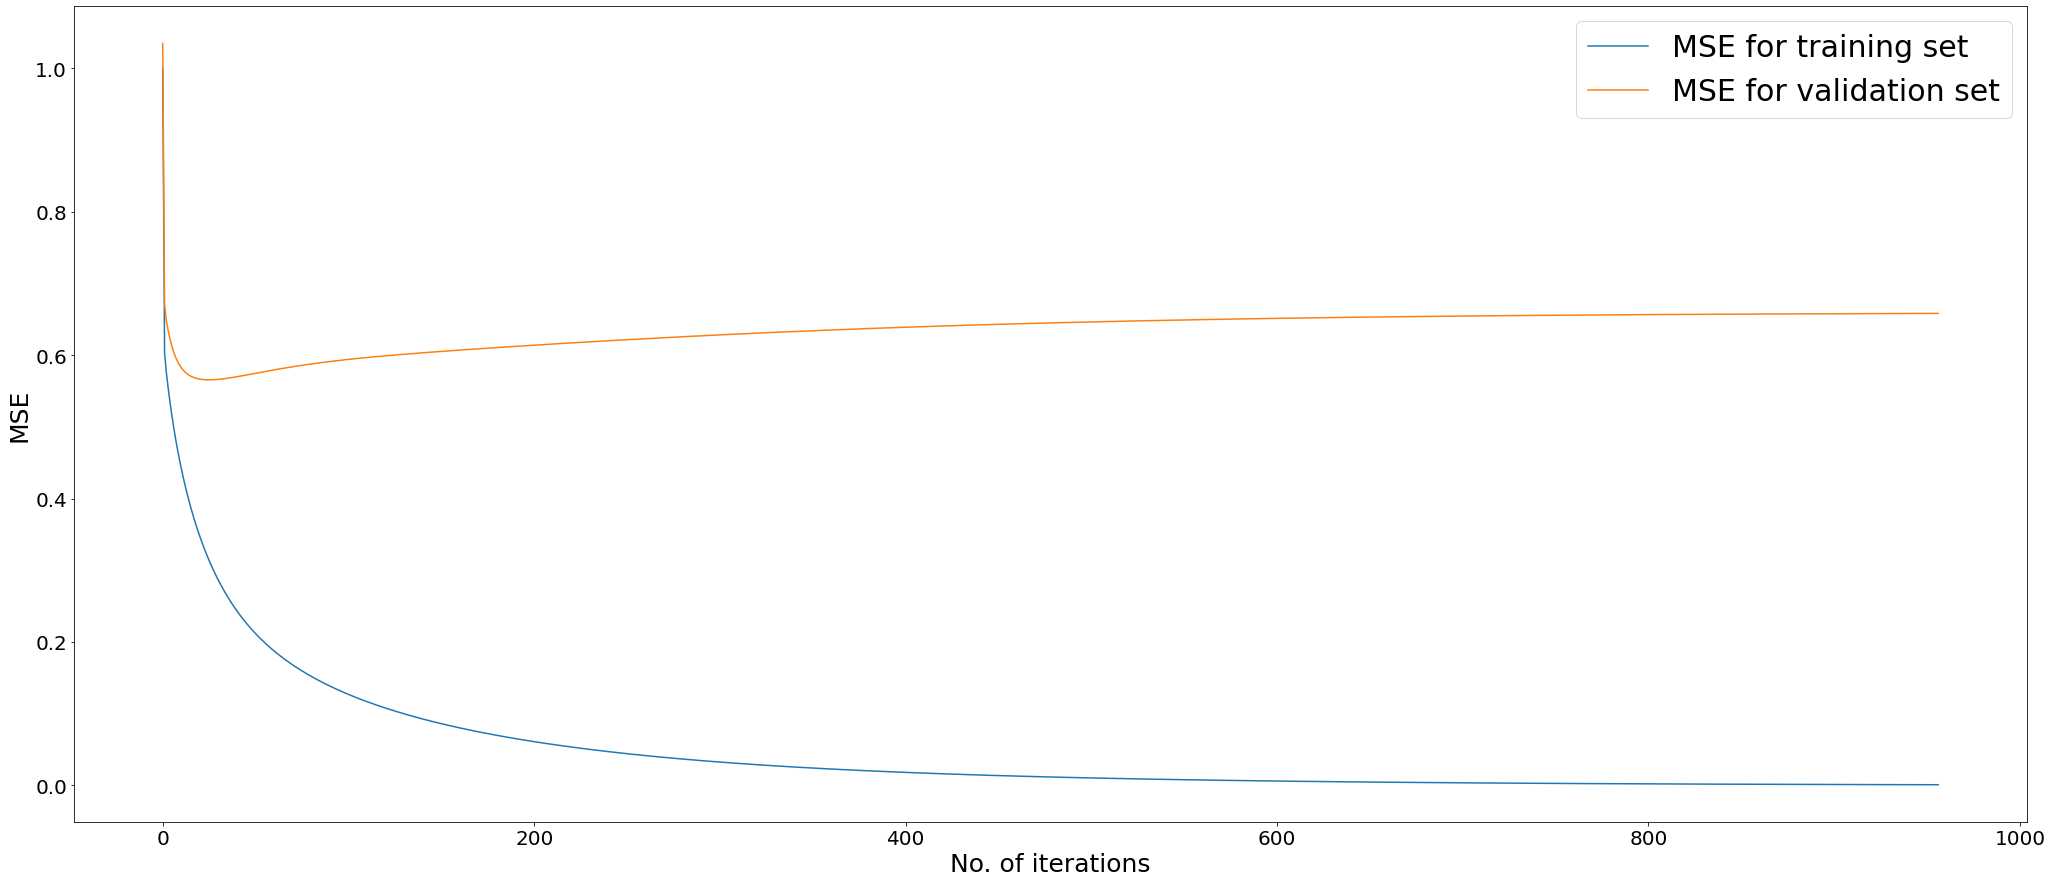

In [57]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [58]:
## Random selection for one half of data
df = df_train.sample(n=X_train.shape[0]//2,replace=True)
# Extracting data from dataframes to array
sample_name_13 = df[0].to_numpy()
y_13 = df[1].to_numpy()
y_13 = np.reshape(y_13,(y_13.shape[0],1))
features_13 = df.iloc[:,2:].to_numpy()

Xt1_3 = np.hstack((np.ones((np.shape(features_13)[0],1)), features_13))

In [59]:
w_13, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt1_3, y_13, X_validation, y_validation, 0.001, 10000, 1e-5, 0)

mse_train = np.sum((Xt1_3@w_13-y_13)**2)/Xt1_3.shape[0]
mae_train = np.sum(np.abs(Xt1_3@w_13-y_13))/Xt1_3.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w_13-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w_13-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

 31%|█████████████████▍                                      | 3109/10000 [00:04<00:08, 773.96it/s]

9.992567276019767e-06
MSE for training set:  0.0001423031672073857
MAE for training set:  0.008998326152385997
MSE for validation set:  0.8949061086209069
MAE for validation set:  0.73964223876637


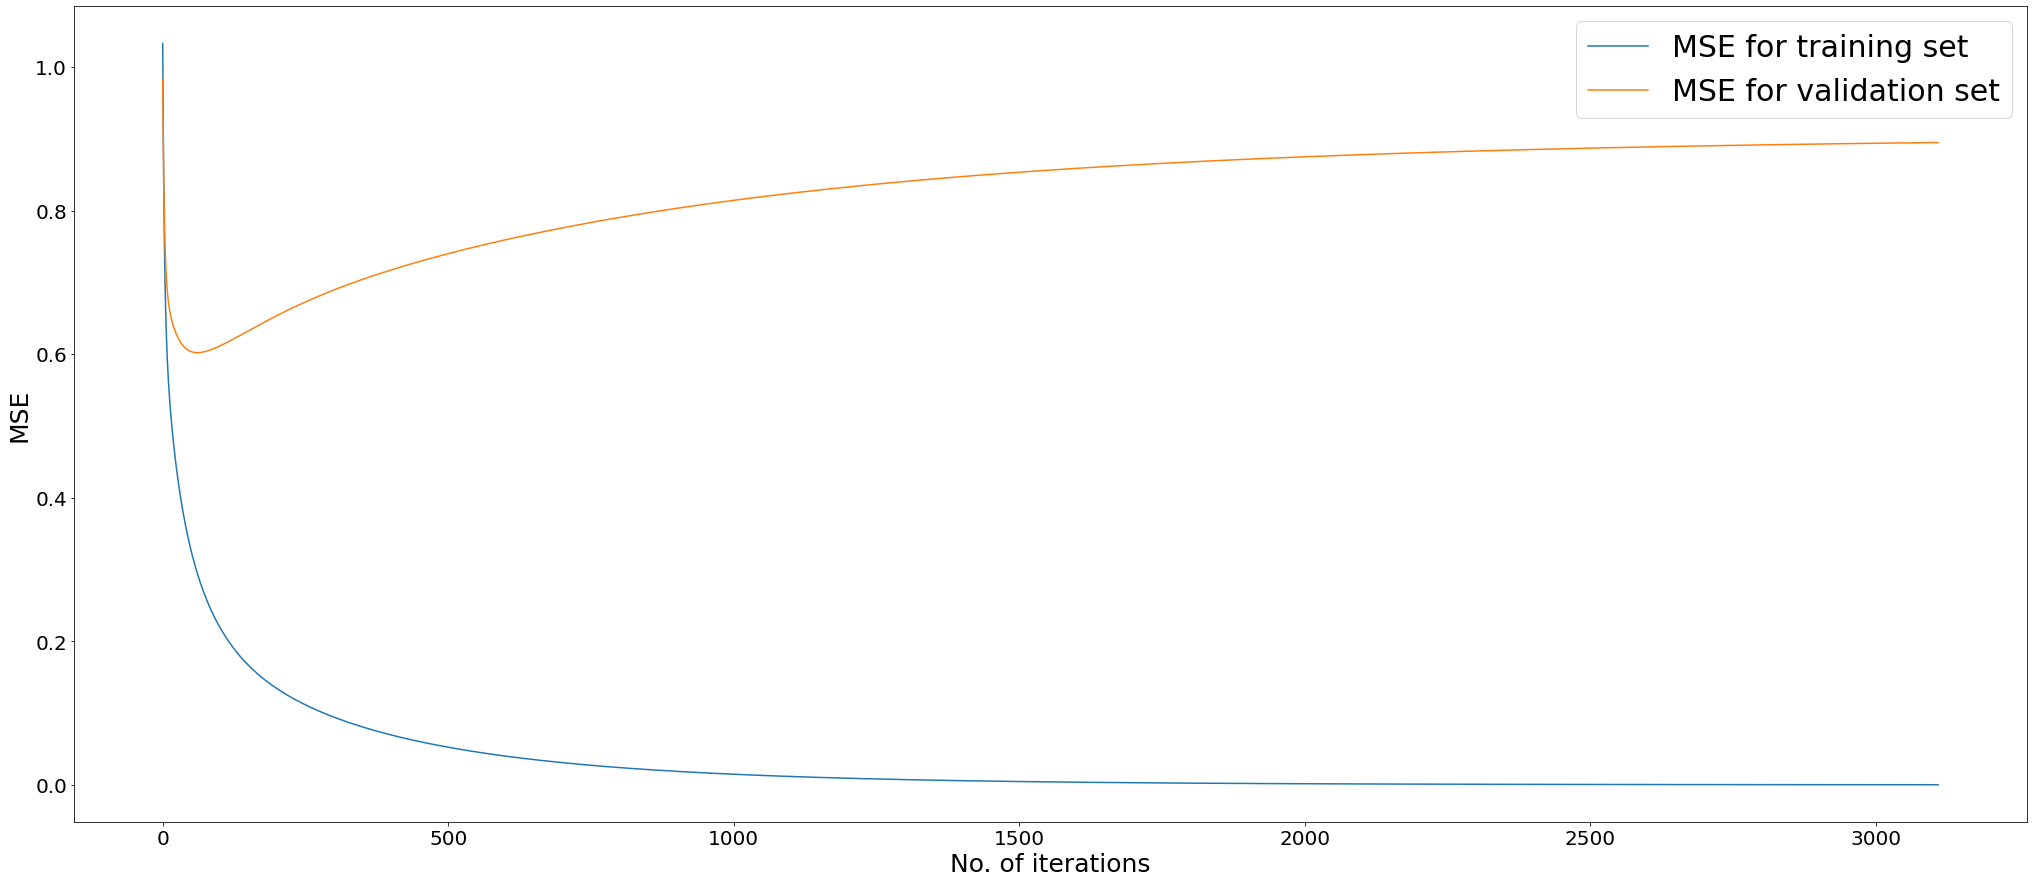

In [60]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [61]:
## Random selection for three-fourths of data
df = df_train.sample(n=3*X_train.shape[0]//4,replace=True)
# Extracting data from dataframes to array
sample_name_13 = df[0].to_numpy()
y_13 = df[1].to_numpy()
y_13 = np.reshape(y_13,(y_13.shape[0],1))
features_13 = df.iloc[:,2:].to_numpy()

Xt1_3 = np.hstack((np.ones((np.shape(features_13)[0],1)), features_13))

In [62]:
w_13, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt1_3, y_13, X_validation, y_validation, 0.001, 10000, 1e-5, 0)

mse_train = np.sum((Xt1_3@w_13-y_13)**2)/Xt1_3.shape[0]
mae_train = np.sum(np.abs(Xt1_3@w_13-y_13))/Xt1_3.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w_13-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w_13-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

 47%|██████████████████████████▏                             | 4669/10000 [00:06<00:07, 699.82it/s]

9.995117803007294e-06
MSE for training set:  0.0007786791900473046
MAE for training set:  0.01778871853823325
MSE for validation set:  0.9224407895964128
MAE for validation set:  0.7273062826966556


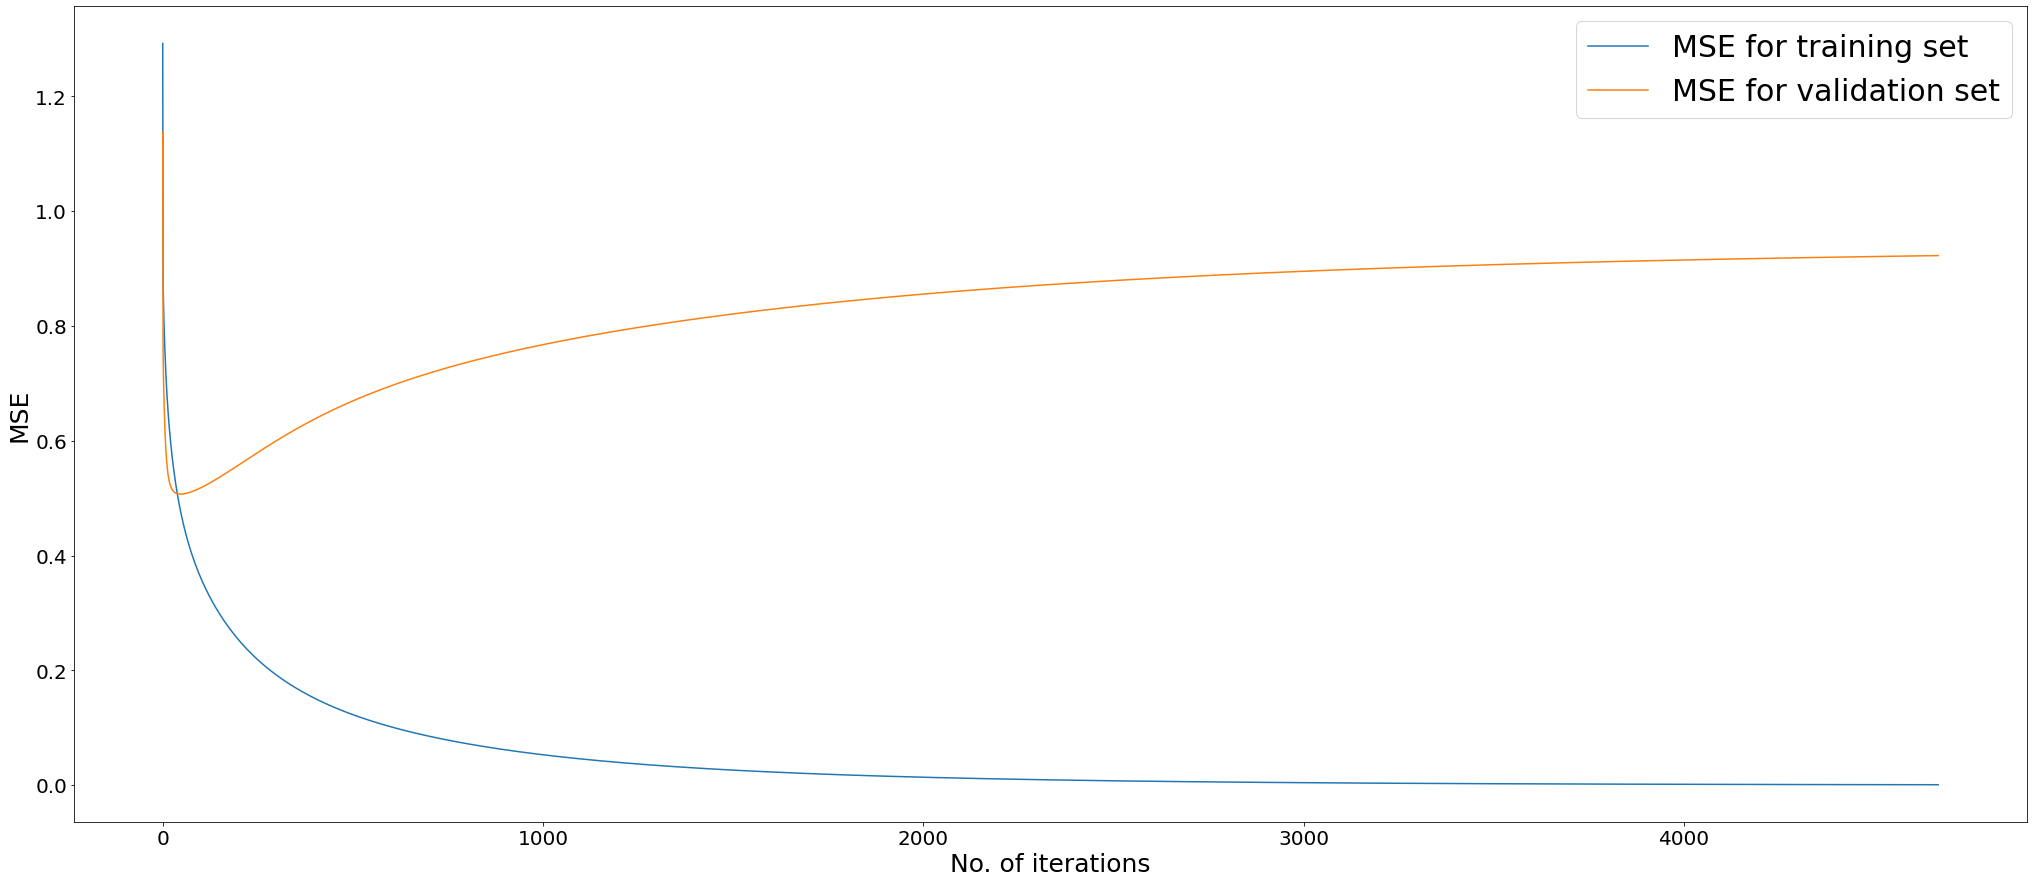

In [63]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [64]:
## Random selection for complete set of data
df = df_train.sample(n=X_train.shape[0],replace=True)
# Extracting data from dataframes to array
sample_name_13 = df[0].to_numpy()
y_13 = df[1].to_numpy()
y_13 = np.reshape(y_13,(y_13.shape[0],1))
features_13 = df.iloc[:,2:].to_numpy()

Xt1_3 = np.hstack((np.ones((np.shape(features_13)[0],1)), features_13))
print(Xt1_3.shape)

(144, 2049)


In [65]:
w_13, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(Xt1_3, y_13, X_validation, y_validation, 0.001, 10000, 1e-5, 0)

mse_train = np.sum((Xt1_3@w_13-y_13)**2)/Xt1_3.shape[0]
mae_train = np.sum(np.abs(Xt1_3@w_13-y_13))/Xt1_3.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w_13-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w_13-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

  0%|                                                          | 21/10000 [00:00<00:14, 672.06it/s]

2.8681229171525842e-06
MSE for training set:  0.48626661707617586
MAE for training set:  0.5361233537727155
MSE for validation set:  0.6643457651621996
MAE for validation set:  0.6295808846955353


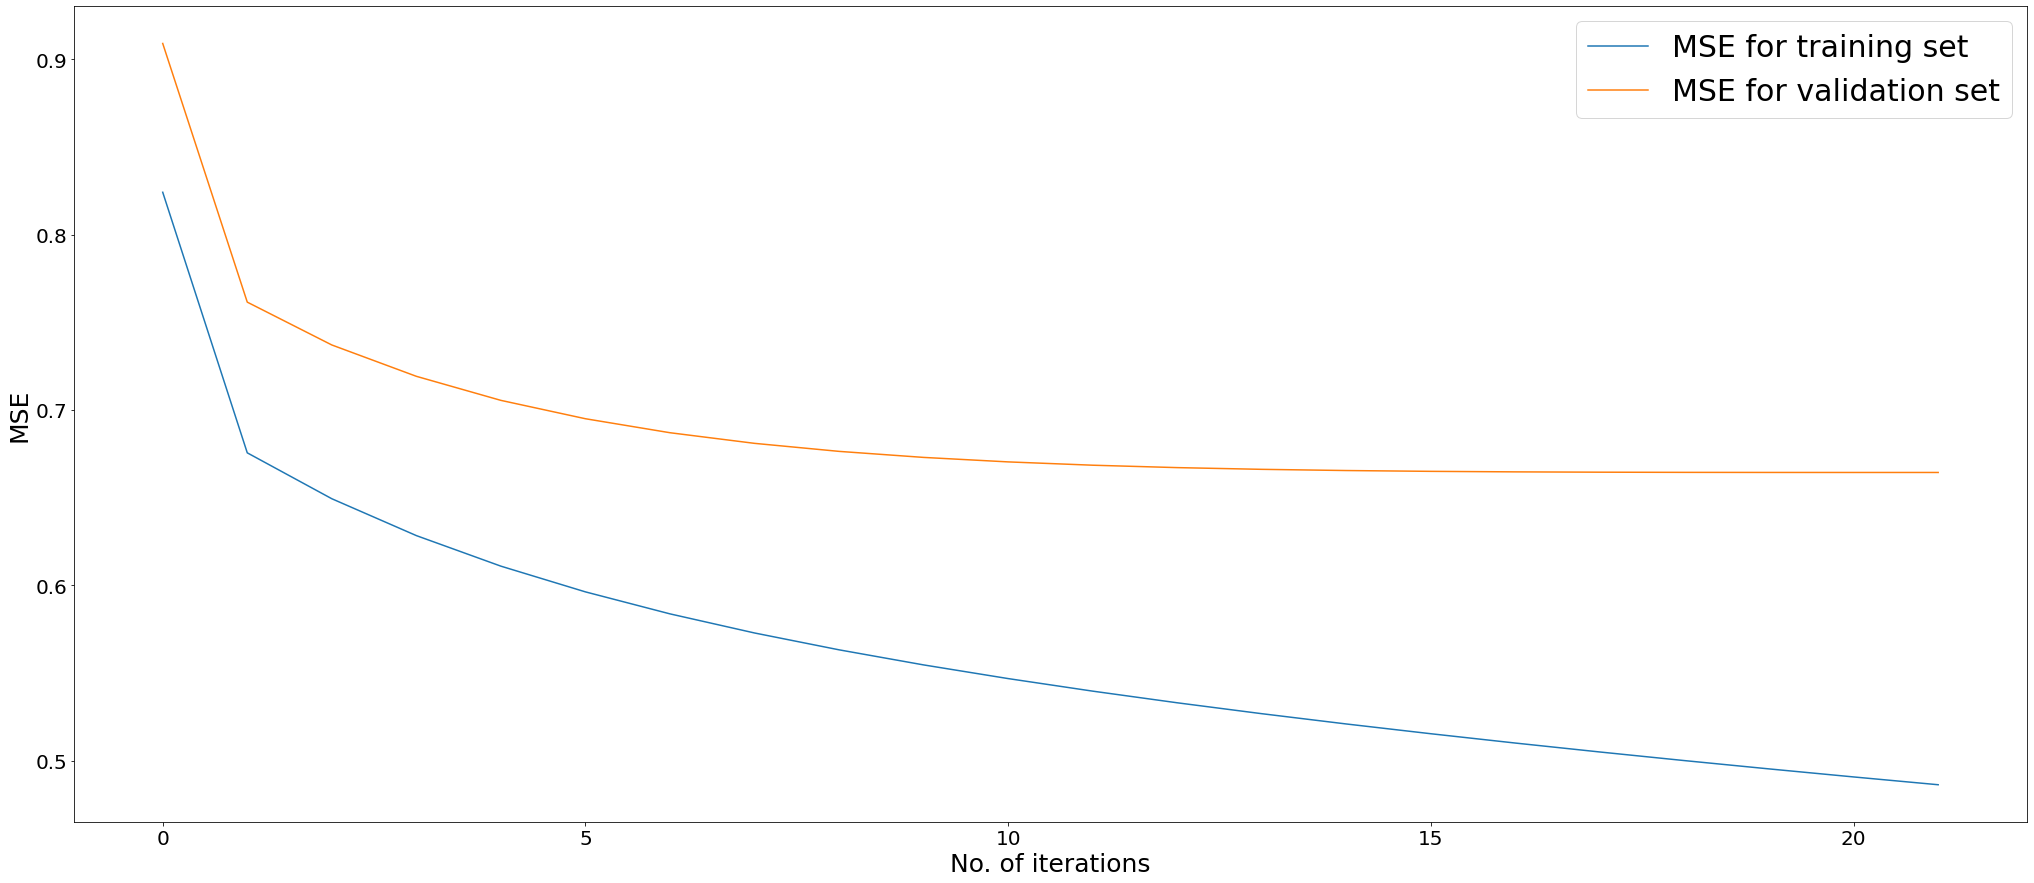

In [66]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t[0:], label = "MSE for training set")
ax.plot(MSE_v[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [67]:
MSEt_comb = [2.2856419846669254e-05, 0.28412358467095505, 0.39684604789792816, 0.27565225560202194]
MSEv_comb = [1.073594007044495, 0.844740312346979, 0.6510447693453653, 0.53426578236516]
dataset = [1/4, 1/2, 3/4, 1]
label = ['1/4', '1/2', '3/4', '1']


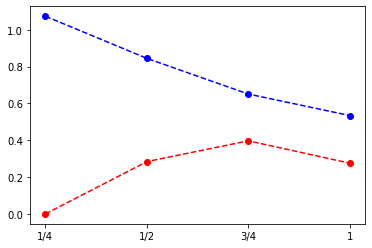

In [68]:
plt.plot(dataset, MSEt_comb, 'ro', linestyle="--")
plt.plot(dataset, MSEv_comb, 'bo', linestyle="--")
plt.xticks(dataset,label)
plt.show()

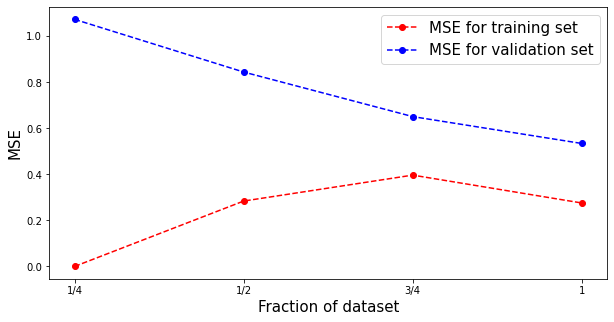

In [69]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(dataset, MSEt_comb, 'ro', linestyle="--", label = 'MSE for training set')
ax.plot(dataset, MSEv_comb, 'bo', linestyle="--", label = 'MSE for validation set')
plt.rcParams['legend.fontsize'] = 15
leg = ax.legend();
ax.set_xlabel('Fraction of dataset', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.xticks(dataset,label)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()

### Dividing data in 2 parts and doing training </br>
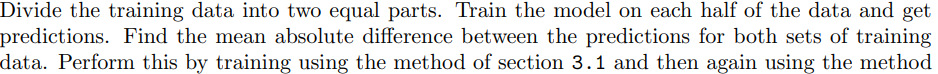

In [70]:
X_train1 = X_train[0:72]
y_train1 = y_train[0:72]

In [71]:
X_train1.shape

(72, 2049)

In [72]:
X_train2 = X_train[72:144]
y_train2 = y_train[72:144]

In [73]:
X_train2.shape

(72, 2049)

In [74]:
## 1st half train, 2nd half test
w, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(X_train1, y_train1, X_validation, y_validation, 0.001, 5000, 1e-5, 0)

  1%|▌                                                          | 49/5000 [00:00<00:06, 784.16it/s]

8.821548847919833e-06


In [75]:
mse_train = np.sum((X_train1@w-y_train1)**2)/X_train1.shape[0]
mae_train = np.sum(np.abs(X_train1@w-y_train1))/X_train1.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  0.3123500440424266
MAE for training set:  0.45374846445411776
MSE for validation set:  0.5529490278322314
MAE for validation set:  0.5752991418189473


In [76]:
## predection over other half
y_pred_lr = X_train2@w

In [77]:
mae = np.sum(np.abs(y_pred_lr-y_train2))/X_train2.shape[0]
print(mae)

0.6785798591649546


In [78]:
np.sum((X_train2@w-y_train2)**2)/X_train2.shape[0]

0.7737038139892526

In [79]:
theta, rMSE_t, rMSE_v = ridge_gradient_descent(X_train1, y_train1, X_validation, y_validation, 120, 0.00001, 5000, 1e-5, 0)

 27%|███████████████▎                                         | 1342/5000 [00:01<00:04, 746.41it/s]

9.984155412045274e-06


In [80]:
rmse_train = np.sum((X_train1@theta-y_train1)**2)/X_train1.shape[0]
rmae_train = np.sum(np.abs(X_train1@theta-y_train1))/X_train1.shape[0]

print("MSE for training set: ", rmse_train)
print("MAE for training set: ", rmae_train)

rmse_validation = np.sum((X_validation@theta-y_validation)**2)/X_validation.shape[0]
rmae_validation = np.sum(np.abs(X_validation@theta-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", rmse_validation)
print("MAE for validation set: ", rmae_validation)

MSE for training set:  0.1375245900100559
MAE for training set:  0.30307510810317656
MSE for validation set:  0.6258663915716384
MAE for validation set:  0.5992960796518103


In [81]:
y_pred_rr = X_train2@theta

In [82]:
mse_rr = np.sum((X_train2@theta-y_train2)**2)/X_train2.shape[0]
mse_rr

0.8416946900823449

In [83]:
mae_rr = np.sum(np.abs(y_pred_rr-y_train2))/X_train2.shape[0]
print(mae_rr)

0.6824134809555047


In [84]:
np.sum(np.abs(y_pred_rr-y_pred_lr))/X_train2.shape[0]

0.1556799842430968

In [85]:
## 1st half train, 2nd half test
w, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(X_train2, y_train2, X_validation, y_validation, 0.001, 5000, 1e-5, 0)

  5%|███                                                       | 265/5000 [00:00<00:05, 812.24it/s]

9.328121990120445e-06


In [86]:
mse_train = np.sum((X_train2@w-y_train2)**2)/X_train2.shape[0]
mae_train = np.sum(np.abs(X_train2@w-y_train2))/X_train2.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  0.18373562956731615
MAE for training set:  0.35044839319728077
MSE for validation set:  0.5508022268154646
MAE for validation set:  0.5883793795593439


In [87]:
## predection over other half
y_pred_lr = X_train1@w

In [88]:
mae = np.sum(np.abs(y_pred_lr-y_train1))/X_train2.shape[0]
print(mae)

0.6627569897328436


In [89]:
np.sum((X_train2@w-y_train2)**2)/X_train2.shape[0]

0.18373562956731615

In [90]:
theta, rMSE_t, rMSE_v = ridge_gradient_descent(X_train2, y_train2, X_validation, y_validation, 120, 0.00001, 5000, 1e-5, 0)

  1%|▋                                                          | 55/5000 [00:00<00:06, 813.80it/s]

5.365430643803604e-06


In [91]:
rmse_train = np.sum((X_train2@theta-y_train2)**2)/X_train1.shape[0]
rmae_train = np.sum(np.abs(X_train2@theta-y_train2))/X_train1.shape[0]

print("MSE for training set: ", rmse_train)
print("MAE for training set: ", rmae_train)

rmse_validation = np.sum((X_validation@theta-y_validation)**2)/X_validation.shape[0]
rmae_validation = np.sum(np.abs(X_validation@theta-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", rmse_validation)
print("MAE for validation set: ", rmae_validation)

MSE for training set:  0.4999738655698896
MAE for training set:  0.5670516811841927
MSE for validation set:  0.6599347836587925
MAE for validation set:  0.6296357011312728


In [92]:
y_pred_rr = X_train1@theta

In [93]:
mse_rr = np.sum((X_train1@theta-y_train1)**2)/X_train2.shape[0]
mse_rr

0.5923356840667078

In [94]:
mae_rr = np.sum(np.abs(y_pred_rr-y_train1))/X_train2.shape[0]
print(mae_rr)

0.6144332211640307


In [95]:
np.sum(np.abs(y_pred_rr-y_pred_lr))/X_train2.shape[0]

0.21455457387236676


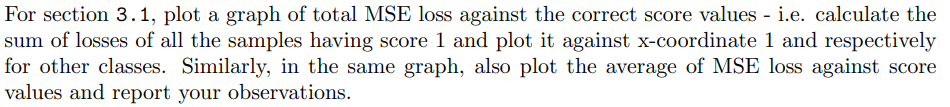

In [96]:
w, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(X_train, y_train, X_validation, y_validation, 0.001, 5000, 1e-5, 0)

  2%|█▎                                                        | 115/5000 [00:00<00:06, 798.14it/s]

7.014888904360144e-06


In [97]:
mse_train = np.sum((X_train@w-y_train)**2)/X_train.shape[0]
mae_train = np.sum(np.abs(X_train@w-y_train))/X_train.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_validation@w-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_validation@w-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  0.38916776862167995
MAE for training set:  0.5014068042425854
MSE for validation set:  0.5634600567431238
MAE for validation set:  0.5629263256519704


In [98]:
y_train_pred = X_train@w

In [99]:
class_mse = np.zeros(10)
class_count = np.zeros(10)
for i in range(0, len(y_train)):
    error = (y_train[i] - y_train_pred[i])**2
    class_mse[y_train[i]] = class_mse[y_train[i]] + error
    class_count[y_train[i]] = class_count[y_train[i]] + 1

In [102]:
dataset = [1,2,3,4,5,6,7,8,9]
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
avg = class_mse/class_count

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14420\3042814059.py:3: RuntimeWarning: invalid value encountered in true_divide
  avg = class_mse/class_count


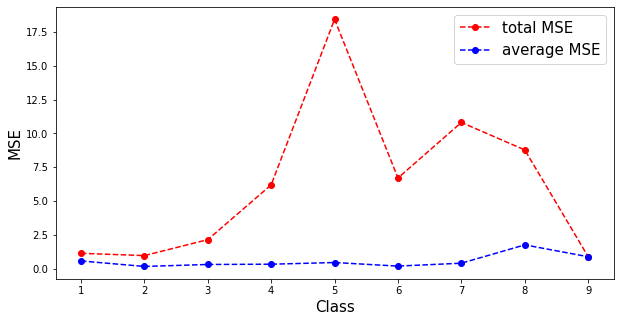

In [103]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(dataset, class_mse[1:], 'ro', linestyle="--", label = 'total MSE')
ax.plot(dataset, avg[1:], 'bo', linestyle="--", label = 'average MSE')
plt.rcParams['legend.fontsize'] = 15
leg = ax.legend();
ax.set_xlabel('Class', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.xticks(dataset,label)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()

In [104]:
y_validation_pred = X_validation@w

In [105]:
class_mse = np.zeros(10)
class_count = np.zeros(10)
for i in range(0, len(y_validation)):
    error = (y_validation[i] - y_validation_pred[i])**2
    class_mse[y_validation[i]] = class_mse[y_validation[i]] + error
    class_count[y_validation[i]] = class_count[y_validation[i]] + 1

In [106]:
dataset = [1,2,3,4,5,6,7,8,9]
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

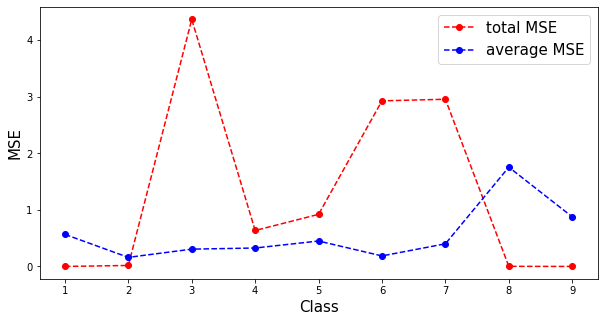

In [107]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(dataset, class_mse[1:], 'ro', linestyle="--", label = 'total MSE')
ax.plot(dataset, avg[1:], 'bo', linestyle="--", label = 'average MSE')
plt.rcParams['legend.fontsize'] = 15
leg = ax.legend();
ax.set_xlabel('Class', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.xticks(dataset,label)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()

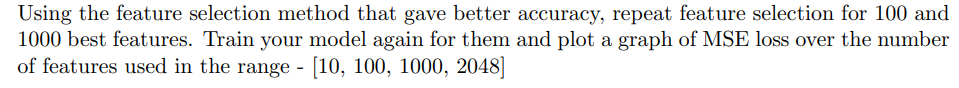

In [108]:
X_comb = np.vstack((X_train, X_validation))
y_comb = np.vstack((y_train, y_validation))
X_new = SelectKBest( mutual_info_regression, k=10).fit_transform(X_comb, np.ravel(y_comb))

In [109]:
X_train_new = X_new[0:144,:]
X_train_new.shape

(144, 10)

In [110]:
X_valid_new = X_new[144:,:]
X_valid_new.shape

(21, 10)

In [111]:
w4, MSE_t4, MSE_v4, MSE_relative4 = gradient_descent_withE(X_train_new, y_train, X_valid_new, y_validation, 0.001, 100000, 1e-6, 0)

 11%|█████▌                                              | 10593/100000 [00:00<00:02, 41470.82it/s]

9.992483387853375e-07


In [112]:
mse_train = np.sum((X_train_new@w4-y_train)**2)/X_train.shape[0]
mae_train = np.sum(np.abs(X_train_new@w4-y_train))/X_train.shape[0]

print("MSE for training set: ", mse_train)
print("MAE for training set: ", mae_train)

mse_validation = np.sum((X_valid_new@w4-y_validation)**2)/X_validation.shape[0]
mae_validation = np.sum(np.abs(X_valid_new@w4-y_validation))/X_validation.shape[0]

print("MSE for validation set: ", mse_validation)
print("MAE for validation set: ", mae_validation)

MSE for training set:  2.220121379019989
MAE for training set:  1.2215769516758586
MSE for validation set:  2.2449512810486874
MAE for validation set:  1.2446750839348593


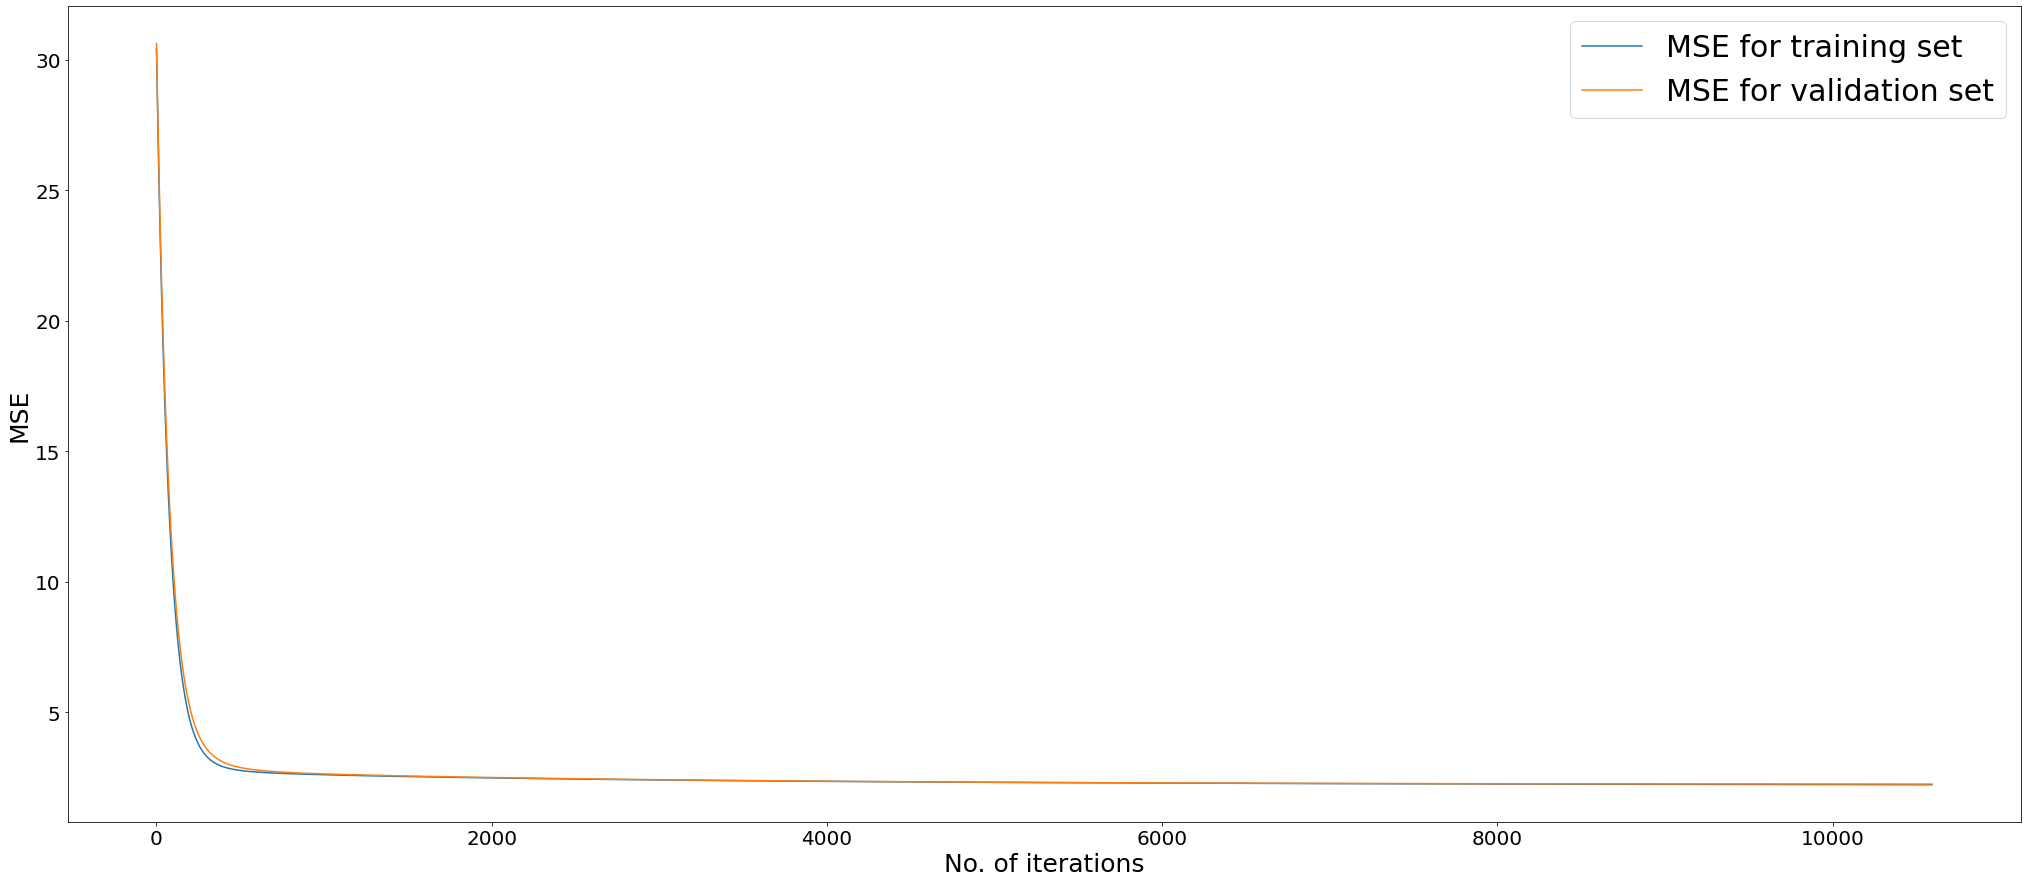

In [113]:
fig,ax = plt.subplots(figsize=(35,15))
ax.plot(MSE_t4[0:], label = "MSE for training set")
ax.plot(MSE_v4[0:], label = "MSE for validation set")
plt.rcParams['legend.fontsize'] = 30
leg = ax.legend();
ax.set_xlabel('No. of iterations', fontsize = 25)
ax.set_ylabel('MSE', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [114]:
dataset = [10,100,1000,2048]
label = ['10', '100', '1000', '2048']

In [115]:
MSEt = [2.579557311223636, 0.34888117760364223,  0.35656486800845166, 0.3882196878110407]
MSEv = [2.292066260668168, 0.7285345673687305, 0.6667636814116243, 0.5635896339838662]

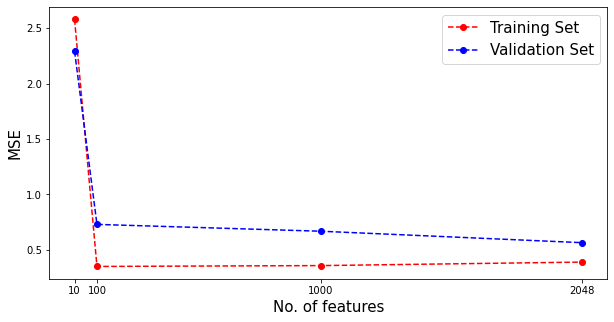

In [116]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(dataset, MSEt, 'ro', linestyle="--", label = 'Training Set')
ax.plot(dataset, MSEv, 'bo', linestyle="--", label = 'Validation Set')
plt.rcParams['legend.fontsize'] = 15
leg = ax.legend();
ax.set_xlabel('No. of features', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.xticks(dataset,label)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()

# Task 3.7
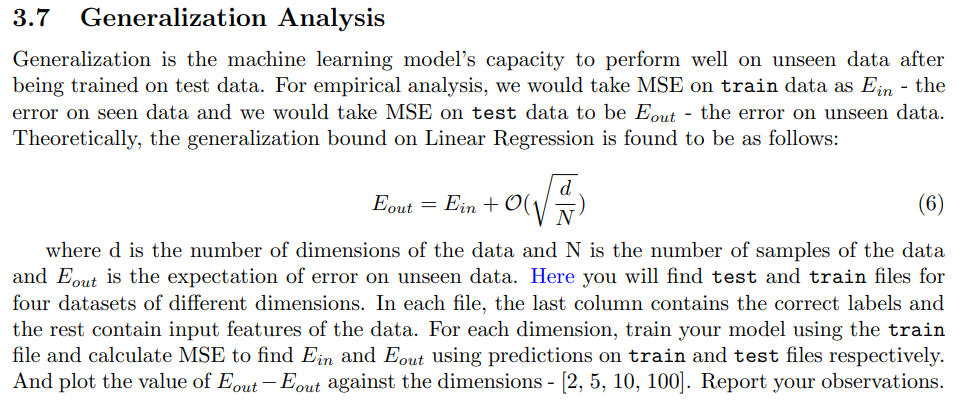

In [123]:
def get_MSE(train_path, test_path):
    df_train = pd.read_csv(train_path, header = None)
    df_train.head()
    
    y_train = df_train.iloc[:,-1].to_numpy()
    y_train = np.reshape(y_train,(y_train.shape[0],1))
    features_train = df_train.iloc[:,0:-1].to_numpy()

    X_train = np.hstack((np.ones((np.shape(features_train)[0],1)), features_train))
    
    # Test set
    df_test = pd.read_csv(test_path, header = None)

    y_test = df_test.iloc[:,-1].to_numpy()
    y_test = np.reshape(y_test,(y_test.shape[0],1))
    features_test = df_test.iloc[:,0:-1].to_numpy()

    X_test = np.hstack((np.ones((np.shape(features_test)[0],1)), features_test))
    
    w, MSE_t, MSE_v, MSE_relative = gradient_descent_withE(X_train, y_train, X_train, y_train, 0.001, 100000, 1e-6, 0)
    
    mse_train2 = np.sum((X_train@w-y_train)**2)/X_train.shape[0]
#     mae_train2 = np.sum(np.abs(X_train@w-y_train))/X_train.shape[0]
#     print("MSE for training set: ", mse_train2)
#     print("MAE for training set: ", mae_train2)
    mse_validation2 = np.sum((X_test@w-y_test)**2)/X_test.shape[0]
#     mae_validation2 = np.sum(np.abs(X_test@w-y_test))/X_test.shape[0]
#     print("MSE for validation set: ", mse_validation2)
#     print("MAE for validation set: ", mae_validation2)
    
    return mse_train2, mse_validation2

In [124]:
train_path = ["2_d_train.csv", "5_d_train.csv", "10_d_train.csv", "100_d_train.csv"]
test_path = ["2_d_test.csv", "5_d_test.csv", "10_d_test.csv", "100_d_test.csv"]

In [125]:
def E():
    E_in = np.zeros(4)
    E_out = np.zeros(4)
    for i in range(0, len(train_path)):
        E_in[i], E_out[i] = get_MSE(train_path[i], test_path[i])
    return E_in, E_out

In [126]:
E_in = np.zeros(4)
E_out = np.zeros(4)
for i in range(0,10):
    E_in1, E_out1 = E()
    E_in+=E_in1
    E_out+=E_out1
    

 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 52045.38it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 51103.03it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 48957.15it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 49749.51it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 51918.95it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 52370.59it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 49038.20it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 52956.86it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 50476.04it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:02, 40097.80it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 44754.53it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 43452.83it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 51181.57it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 51519.61it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 51244.89it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 51450.03it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 52506.68it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 50404.02it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 50434.02it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 49733.60it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 50671.67it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 50908.32it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 50920.76it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 52864.67it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:02, 39335.03it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 46074.27it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 46581.78it/s]


9.998321582544488e-07


 18%|█████████▏                                          | 17760/100000 [00:00<00:01, 48472.18it/s]


9.999551769467912e-07


 14%|███████▎                                            | 13956/100000 [00:00<00:01, 44497.81it/s]


9.998152385904385e-07


 19%|█████████▋                                          | 18622/100000 [00:00<00:01, 48001.01it/s]


9.998321582544488e-07


100%|███████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 23818.80it/s]


In [127]:
d = [2, 5, 10, 100]
N = [131, 131, 131, 131]
label = ['2', '5', '10', '100']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


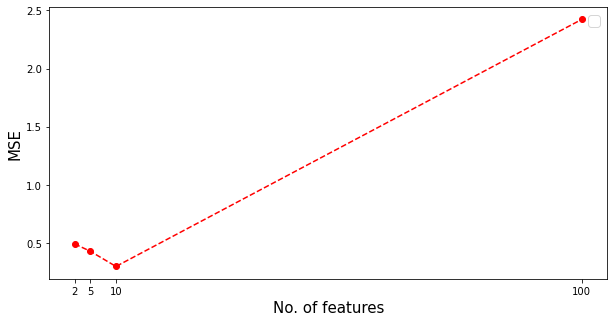

In [128]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.array(d),(E_out-E_in)/10, 'ro', linestyle="--")
# ax.plot(np.array(d), np.array(d)**0.5/131**0.5, 'bo', linestyle="--")
plt.rcParams['legend.fontsize'] = 15
leg = ax.legend();
ax.set_xlabel('No. of features', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.xticks(d,label)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()